## Validation of users by Income + job title regression

In this notebook, I aim to perform the final validation of the user voordinates via regression between Income and estimated SES. 
The validation includes:
- Simple linear Regression and multiple linear regression (ordinary least squares) on coordinates and income for nine different models*
- *Model comparison between nine different configurations of markers included in the network
    - Goofness of fit characteristics
- End result is identification of the best marker configuration for obtaining the best linreg fit

In [1]:
import os
import re
import sys
import numpy as np
import pandas as pd
import matplotlib
import spacy
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import FrenchStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

import importlib
# Local application imports
sys.path.insert(0, '../Utility files')
import utils2
from utils2 import *

## 1 Connect job titles and income information to all coordinate files

First and foremost, I need to add all the income + job information per user to each of the nine coordinate files m1-m9
Create a function that:
- Iterates over each file system, from n=1 to n=9
- Removes all users that do not occur in the job title file onlygreenscleaned

In [5]:
#Load the income + job title data
path= '/home/livtollanes/10.jan-thesis/Code/Validation/Data/'
file = 'onlygreens_cleaned.csv'
jobs = pd.read_csv(path + file, index_col= 0, dtype={'follower_id': str})

In total, we have 11 684 unique users with a job title after preprocessing

In [21]:
# #Some job category stats
# pd.set_option('display.max_rows', None)
# jobs['title'] = jobs['title'].str.strip()
# print(jobs['PCS_ESE_name'].value_counts().sort_index())

#jobs['PCS_ESE_name'].nunique() #111 key words/titles, and 58 job categories

PCS_ESE_name
Adjoints administratifs des collectivités locales                                                 347
Aides à domicile, aides ménagères, travailleuses familiales                                         4
Aides-soignants                                                                                    34
Allocataires de la recherche publique                                                             273
Animateurs socioculturels et de loisirs                                                             6
Architectes salariés                                                                               85
Artisans salariés de leur entreprise                                                               45
Artistes de la danse                                                                               16
Artistes de la musique et du chant                                                                356
Artistes dramatiques                                                 

Just to reiterate, these are the models (which markers are included?):
- m1:All
- m2: Remove party
- m3: Remove media, party, university
- m4: Remove media, party, university, football
- m5: Remove media, party, university, lux and vetements and football
- m6: Remove media, party, university, clearly lux brands, and football
- m7: Include only things you can buy (restaurants, commerce, grande distr. Luxe et vet, sport)
- m8: Magazine, media only
- m9: Education, ecole de commerce, lycees only


From these nine models, which contain coordinates for user populations of variable sizes, I am selecting the user coordinates that have job titles. Thus, the final model testing here will be on even smaller sample sizes. 

In [13]:
#Create CA job coord files
importlib.reload(utils2)
#Create the user coordinate files for all models - for users with job titles

dfs1 = []  # list to store all dataframes

for file_number in range(1, 10):  # loop over the coordinate files for models 1 to 9
    filtered_df = utils2.filter_add_jobs_coords(file_number, jobdf=jobs)
    dfs1.append(filtered_df)  # add the filtered dataframe to the list

# Now dfs is a list of all the filtered dataframes


# # Load dfs into variables 
# df1 = dfs[0] 
# df2 = dfs[1] 
# df3 = dfs[2]
# df4 = dfs[3] 
# df5 = dfs[4] 
# df6 = dfs[5] 
# df7 = dfs[6] 
# df8 = dfs[7] 
# df9 = dfs[8] 


for i, df in enumerate(dfs1):
    print(f"Shape of dataframe {i+1}: {df.shape}")

Constructed file path: /home/livtollanes/NewData/coordinates/m1_coords/m1_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m2_coords/m2_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m3_coords/m3_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m4_coords/m4_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m5_coords/m5_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m6_coords/m6_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m7_coords/m7_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m8_coords/m8_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m9_coords/m9_row_coordinates.csv
Shape of dataframe 1: (11678, 14)
Shape of dataframe 2: (11677, 14)
Shape of dataframe 3: (10958, 14)
Shape of dataframe 4: (10681, 14)
Shape of dataframe

## 2 Model Comparison


BEfore assessing the best dimension for describing the relationship between SES and INCOME, I must find the best model.
I will fit two multiple linear regression models on all nine model_dfs: one  classic and one heirarchical, taking PCE_ESE into account. 

- Models will be compared based on some yet to be determined goodness of fit characteristic. RMSE, R-squared, etc.
- Once the best model_df has been found, further inspection will be done on this to determine impact of dimensions. 


### Exploratory Data Analysis

Relationships between Income and SES for 

### OLS Assumption checks for non hierarchical multiple Lin Reg

1. Linearity of outcome var and predictor vars
2. Homoscedasticity - Equal variance
3. Normality of error distribution
4. Independent observations, no autocorrelation
5. Predictors are not correlated with each other
6. Outliers should not be present too far


https://medium.com/@shuv.sdr/multiple-linear-regression-in-python-4ee79d763e8f

Model formula: 

Income ~ dim1 + dim2 + dim3, data = [m1...m9]

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

#### 1 Linearity of residuals and coefficients

In [53]:
grouped_dfs[0].head()

,0,1,2
PCS_ESE,,,
210x,0.091021,-0.325158,0.342067
311d,-0.401521,-0.135353,-0.154100
312a,-0.308013,-0.129060,-0.148096
332a,-0.499503,-0.354841,-0.290470
341b,-0.274219,-0.033042,-0.364332


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not PCS_ESE
210x    2
311d    3
312a    3
332a    3
341b    3
342b    3
342f    3
342g    3
342h    3
344a    3
344b    3
344d    3
351a    3
352a    3
354a    3
354b    3
354c    3
354e    3
354f    3
372a    3
372b    3
372e    3
372f    3
374b    3
375b    3
376a    3
376g    3
381b    3
382b    3
424a    4
431f    4
432d    4
433a    4
434a    4
435b    4
461b    4
461d    4
462e    4
465a    4
465b    4
467a    4
478a    4
481a    4
523c    5
526a    5
533a    5
542a    5
561b    5
562a    5
563b    5
631a    6
632a    6
636c    6
641a    6
654b    6
656b    6
Name: color, dtype: object

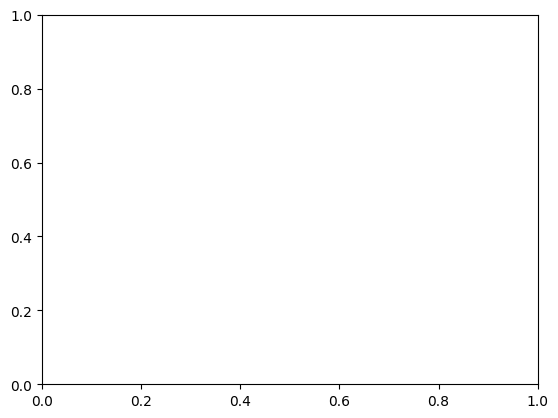

In [59]:
import matplotlib.pyplot as plt

outcome = 'Salaire_moyen_en_EQTP'
predictors = ['0', '1', '2']

# #Ungrouped data
# # Assume 'outcome' is your outcome variable, and 'predictors' is a list of your predictor variables
# for i, df in enumerate(dfs):
#     for predictor in predictors:
#         plt.scatter(df[predictor], df[outcome])
#         plt.xlabel(predictor)
#         plt.ylabel(outcome)
#         plt.title(f'Dataframe {i+1}: {outcome} vs {predictor}')
#         plt.show()


#Grouped
# Group by 'PCS_ESE' and calculate mean
grouped_dfs = [df.groupby('PCS_ESE')[predictors + [outcome]].mean() for df in dfs]

# Add a new column for the first number in the 'PCS_ESE' group
for df in grouped_dfs:
    df['color'] = df.index.str[0].astype(int)

# Plot scatter plots for each grouped dataframe
for i, df in enumerate(grouped_dfs):
    for predictor in predictors:
        plt.scatter(df[predictor], df[outcome], c=df['color'])
        plt.xlabel(predictor)
        plt.ylabel(outcome)
        plt.title(f'Grouped Dataframe {i+1}: {outcome} vs {predictor}')
        plt.colorbar(label='Color')
        plt.show()

In [ ]:
import numpy as np

# Group by 'PCS_ESE' and calculate mean
grouped_dfs = [df.groupby('PCS_ESE')[predictors + [outcome]].mean() for df in dfs]

# Add a new column for the first number in the 'PCS_ESE' group
for df in grouped_dfs:
    df['color'] = df.index.str[0].astype(int)

# Get unique color categories
color_categories = np.unique(np.concatenate([df['color'].unique() for df in grouped_dfs]))

# Plot scatter plots for each grouped dataframe
for i, df in enumerate(grouped_dfs):
    for predictor in predictors:
        for color in color_categories:
            plt.scatter(df.loc[df['color'] == color, predictor], df.loc[df['color'] == color, outcome], 
                        c=df.loc[df['color'] == color, 'color'], label=f'Color {color}')
        plt.xlabel(predictor)
        plt.ylabel(outcome)
        plt.title(f'Grouped Dataframe {i+1}: {outcome} vs {predictor}')
        plt.colorbar(label='Color')
        plt.legend()
        plt.show()

In [ ]:
import numpy as np

# Group by 'PCS_ESE' and calculate mean
grouped_dfs = [df.groupby('PCS_ESE')[predictors + [outcome]].mean() for df in dfs]

# Add a new column for the first number in the 'PCS_ESE' group
for df in grouped_dfs:
    df['color'] = df.index.str[0].astype(int)

# Get unique color categories
color_categories = np.unique(np.concatenate([df['color'].unique() for df in grouped_dfs]))

# Plot scatter plots for each grouped dataframe
for i, df in enumerate(grouped_dfs):
    for predictor in predictors:
        for color in color_categories:
            plt.scatter(df.loc[df['color'] == color, predictor], df.loc[df['color'] == color, outcome], 
                        c=df.loc[df['color'] == color, 'color'], label=f'Color {color}')
        plt.xlabel(predictor)
        plt.ylabel(outcome)
        plt.title(f'Grouped Dataframe {i+1}: {outcome} vs {predictor}')
        plt.colorbar(label='Color')
        plt.legend()
        plt.show()

The ungrouped data does not appear to have any linearity at all. The grouped data does. 

### REML/ML Assumption Checks for hierarchical multiple LinReg 

Mixed OLS assumptions

In [48]:
# Loading CA job coord files

importlib.reload(utils2)

dfs = []  # list to store all dataframes

for file_number in range(1, 10):  # loop over the coordinate files for models 1 to 9
    filtered_df = utils2.load_CA_model_files(file_number)
    dfs.append(filtered_df)  # add the filtered dataframe to the list

for i, df in enumerate(dfs):
    print(f"Shape of dataframe {i+1}: {df.shape}")

# Replace spaces in column names with underscores
for df in dfs:
    df.columns = df.columns.str.replace(' ', '_')


Used file path: /home/livtollanes/NewData/job_title_coordinates/m1_jobs_rowcoords.csv
Used file path: /home/livtollanes/NewData/job_title_coordinates/m2_jobs_rowcoords.csv
Used file path: /home/livtollanes/NewData/job_title_coordinates/m3_jobs_rowcoords.csv
Used file path: /home/livtollanes/NewData/job_title_coordinates/m4_jobs_rowcoords.csv
Used file path: /home/livtollanes/NewData/job_title_coordinates/m5_jobs_rowcoords.csv
Used file path: /home/livtollanes/NewData/job_title_coordinates/m6_jobs_rowcoords.csv
Used file path: /home/livtollanes/NewData/job_title_coordinates/m7_jobs_rowcoords.csv
Used file path: /home/livtollanes/NewData/job_title_coordinates/m8_jobs_rowcoords.csv
Used file path: /home/livtollanes/NewData/job_title_coordinates/m9_jobs_rowcoords.csv
Shape of dataframe 1: (11678, 14)
Shape of dataframe 2: (11677, 14)
Shape of dataframe 3: (10958, 14)
Shape of dataframe 4: (10681, 14)
Shape of dataframe 5: (10621, 14)
Shape of dataframe 6: (10626, 14)
Shape of dataframe 7: 

### Assumption 1 - Linearity of coefficients and residuals

In [22]:
#simple

# Assume X and y are your predictors and outcome
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

# Calculate residuals
residuals = results.resid
predicted_values = results.fittedvalues

# Plot residuals vs predicted values
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

Index(['follower_id', '0', '1', '2', '3', 'screen_name', 'key_word',
       'description_cleantext', 'PCS_ESE', 'PCS_ESE_name', 'titles', 'label',
       'Salaire_moyen_en_EQTP', 'title'],
      dtype='object')

In [21]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Define the outcome and predictors
outcome = 'Salaire_moyen_en_EQTP'
predictors = ['0', '1', '2']

# Create a dataframe to store the results
summary = pd.DataFrame(columns=['Dataframe', 'Linearity', 'Homoscedasticity', 'Normality', 'Multicollinearity', 'Autocorrelation'])




for i, df in enumerate(dfs):
    # Fit the model
    model = smf.ols(f"{outcome} ~ Q('0') + Q('1') + Q('2')", data=df,)    
    results = model.fit()

    # Check linearity
    linearity = all(df[predictor].corr(df[outcome]) > 0.7 for predictor in predictors)

    # Check homoscedasticity
    _, pval, _, _ = sm.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
    homoscedasticity = pval > 0.05

    # Check normality of residuals
    normality = stats.shapiro(results.resid)[1] > 0.05

    # Check multicollinearity
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df[predictors].values, j) for j in range(df[predictors].shape[1])]
    multicollinearity = all(vif["VIF Factor"] < 5)

    # Check autocorrelation
    autocorrelation = 1.5 < sm.stats.stattools.durbin_watson(results.resid) < 2.5

    # Add the results to the summary dataframe
    summary = pd.concat([summary, pd.DataFrame({
        'Dataframe': [i+1],
        'Linearity': [linearity],
        'Homoscedasticity': [homoscedasticity],
        'Normality': [normality],
        'Multicollinearity': [multicollinearity],
        'Autocorrelation': [autocorrelation]
    })], ignore_index=True)

# Print the summary
print(summary)

/tmp/ipykernel_1075602/3431366160.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11678.
  normality = stats.shapiro(results.resid)[1] > 0.05
/tmp/ipykernel_1075602/3431366160.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11677.
  normality = stats.shapiro(results.resid)[1] > 0.05
/tmp/ipykernel_1075602/3431366160.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10958.
  normality = stats.shapiro(results.resid)[1] > 0.05
/tmp/ipykernel_1075602/3431366160.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10681.
  normality = stats.shapiro(results.resid)[1] > 0.05
/tmp/ipykernel_1075602/3431366160.py:34: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10621.
  normality = stats.shapiro(results.resid)[1] > 0.05


  Dataframe Linearity Homoscedasticity Normality Multicollinearity  \
0         1     False            False     False              True   
1         2     False            False     False              True   
2         3     False            False     False              True   
3         4     False            False     False              True   
4         5     False            False     False              True   
5         6     False            False     False              True   
6         7     False            False     False              True   
7         8     False            False     False              True   
8         9     False            False     False              True   

  Autocorrelation  
0            True  
1            True  
2            True  
3            True  
4            True  
5            True  
6            True  
7            True  
8            True  



Results for model 1:



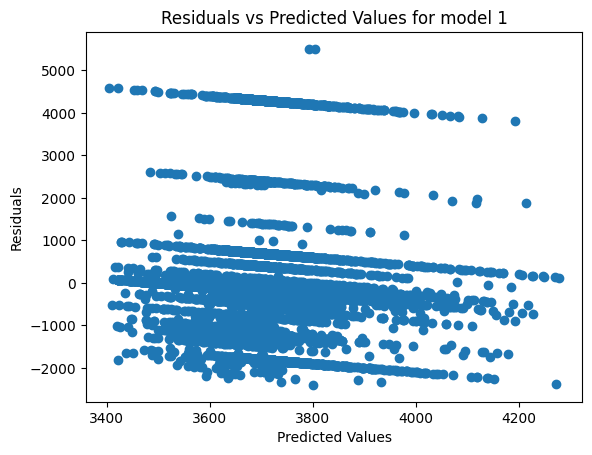

Mean of the residuals for model 1 is: -2.0161841787547154e-12
Correlation between residuals and 0 for model 1: 7.012137265746704e-16
Correlation between residuals and 1 for model 1: -1.6745422815618692e-16
Correlation between residuals and 2 for model 1: 1.0504700938873053e-15
Autocorrelation for model 1: True
Homoscedasticity for model 1: False
Multicollinearity for model 1: True
Normality for model 1: False

Results for model 2:



/tmp/ipykernel_1075602/2295931250.py:43: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11678.
  normality = stats.shapiro(residuals)[1] > 0.05


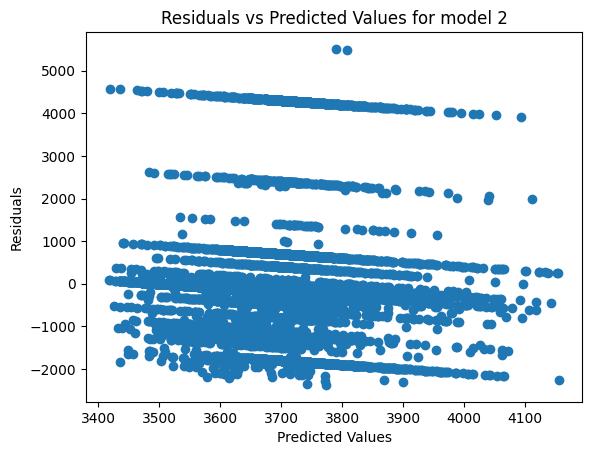

Mean of the residuals for model 2 is: 4.3367872736761704e-13
Correlation between residuals and 0 for model 2: 1.763436575217976e-16
Correlation between residuals and 1 for model 2: -2.838667611006331e-16
Correlation between residuals and 2 for model 2: -1.2310689216914354e-17
Autocorrelation for model 2: True
Homoscedasticity for model 2: False
Multicollinearity for model 2: True
Normality for model 2: False


/tmp/ipykernel_1075602/2295931250.py:43: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11677.
  normality = stats.shapiro(residuals)[1] > 0.05



Results for model 3:



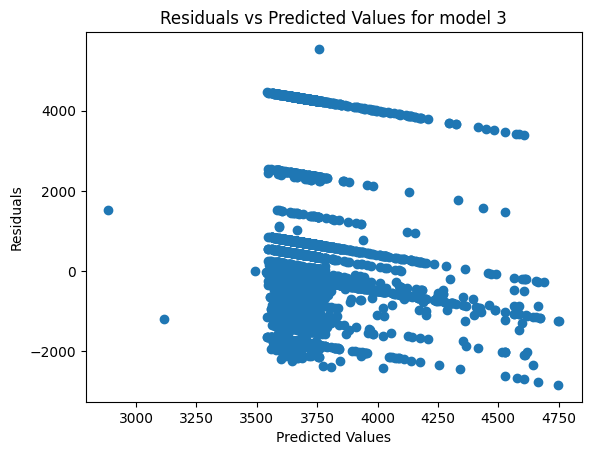

Mean of the residuals for model 3 is: 3.638642793002845e-13
Correlation between residuals and 0 for model 3: 3.0642032065869136e-16
Correlation between residuals and 1 for model 3: 2.517682385372019e-16
Correlation between residuals and 2 for model 3: 1.6106190585977442e-16
Autocorrelation for model 3: True
Homoscedasticity for model 3: False
Multicollinearity for model 3: True
Normality for model 3: False

Results for model 4:



/tmp/ipykernel_1075602/2295931250.py:43: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10958.
  normality = stats.shapiro(residuals)[1] > 0.05


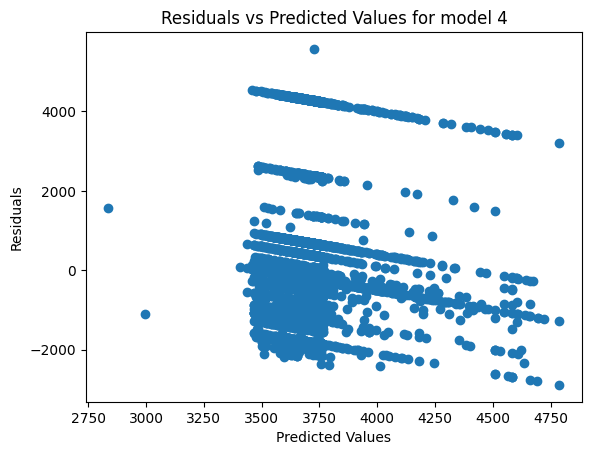

Mean of the residuals for model 4 is: 6.784808336042217e-13
Correlation between residuals and 0 for model 4: 3.4232840878529425e-16
Correlation between residuals and 1 for model 4: -2.7704905867618836e-16
Correlation between residuals and 2 for model 4: 4.486724264667401e-16
Autocorrelation for model 4: True
Homoscedasticity for model 4: False
Multicollinearity for model 4: True
Normality for model 4: False


/tmp/ipykernel_1075602/2295931250.py:43: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10681.
  normality = stats.shapiro(residuals)[1] > 0.05



Results for model 5:



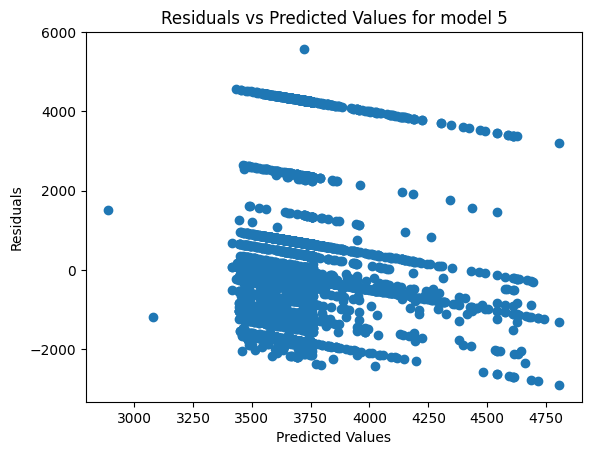

Mean of the residuals for model 5 is: -3.8883660124381065e-12
Correlation between residuals and 0 for model 5: -6.697849154308389e-16
Correlation between residuals and 1 for model 5: 1.6743593245522246e-16
Correlation between residuals and 2 for model 5: 6.961908108950319e-16
Autocorrelation for model 5: True
Homoscedasticity for model 5: False
Multicollinearity for model 5: True
Normality for model 5: False


/tmp/ipykernel_1075602/2295931250.py:43: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10621.
  normality = stats.shapiro(residuals)[1] > 0.05



Results for model 6:



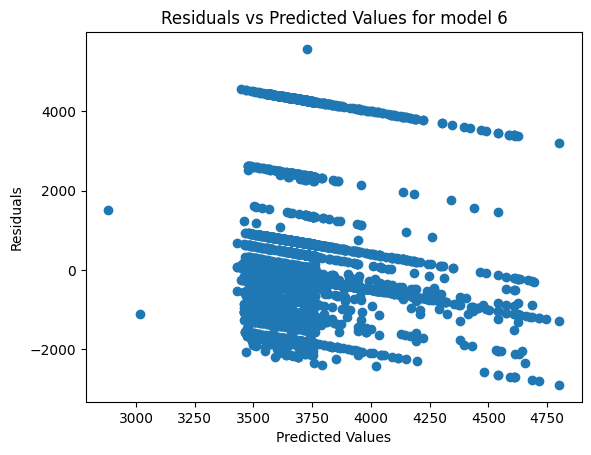

Mean of the residuals for model 6 is: -3.4305051427685832e-12
Correlation between residuals and 0 for model 6: -1.756440832506818e-15
Correlation between residuals and 1 for model 6: -1.0557457479374323e-15
Correlation between residuals and 2 for model 6: 3.419881900377325e-15
Autocorrelation for model 6: True
Homoscedasticity for model 6: False
Multicollinearity for model 6: True
Normality for model 6: False

Results for model 7:



/tmp/ipykernel_1075602/2295931250.py:43: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10626.
  normality = stats.shapiro(residuals)[1] > 0.05


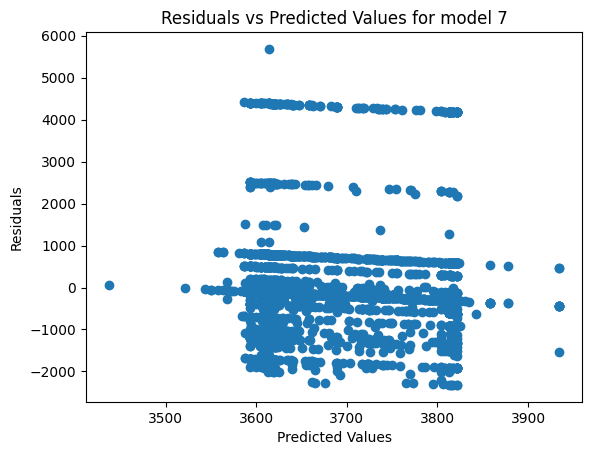

Mean of the residuals for model 7 is: -6.99215824992189e-14
Correlation between residuals and 0 for model 7: 4.663253692770056e-16
Correlation between residuals and 1 for model 7: -8.230606372452855e-16
Correlation between residuals and 2 for model 7: 1.2181054590325191e-15
Autocorrelation for model 7: True
Homoscedasticity for model 7: False
Multicollinearity for model 7: True
Normality for model 7: False

Results for model 8:



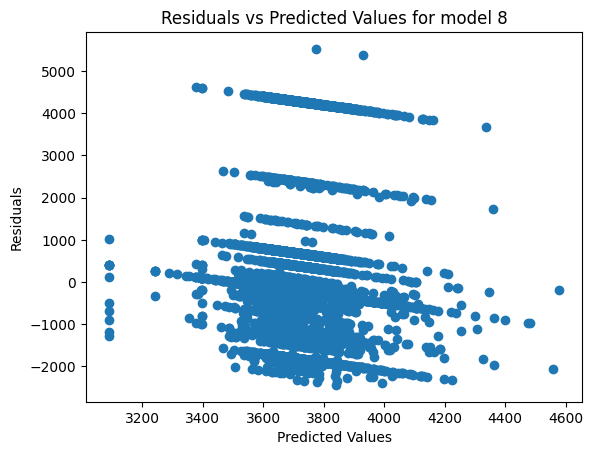

Mean of the residuals for model 8 is: -2.1795041378133622e-12
Correlation between residuals and 0 for model 8: -4.868561142725728e-17
Correlation between residuals and 1 for model 8: 8.891096703044895e-17
Correlation between residuals and 2 for model 8: 7.52039598788199e-17
Autocorrelation for model 8: True
Homoscedasticity for model 8: False
Multicollinearity for model 8: True
Normality for model 8: False

Results for model 9:



/tmp/ipykernel_1075602/2295931250.py:43: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11524.
  normality = stats.shapiro(residuals)[1] > 0.05


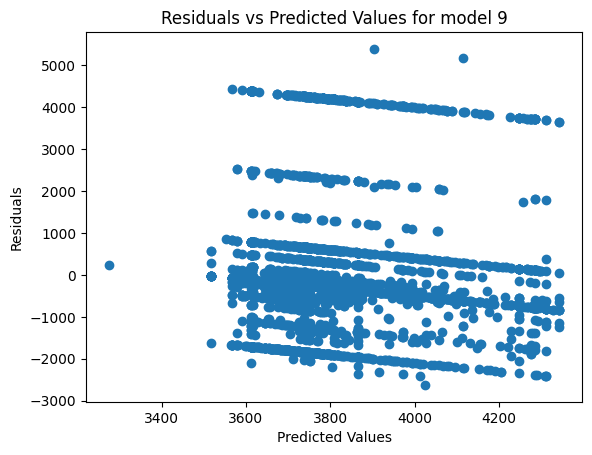

Mean of the residuals for model 9 is: -3.585049920470592e-12
Correlation between residuals and 0 for model 9: 3.296936931979399e-16
Correlation between residuals and 1 for model 9: -9.946649326142448e-16
Correlation between residuals and 2 for model 9: 1.3983728885045359e-16
Autocorrelation for model 9: True
Homoscedasticity for model 9: False
Multicollinearity for model 9: True
Normality for model 9: False


In [24]:
for i, df in enumerate(dfs):
    # Fit the model
    model = smf.ols(f"{outcome} ~ Q('0') + Q('1') + Q('2')", data=df,)    
    results = model.fit()

    print(f"\nResults for model {i+1}:\n")

    # 1. Linearity in the coefficients: already assumed in the model specification
    #    Linearity in the error term: can be checked by plotting residuals vs predicted values
    predicted_values = results.fittedvalues
    residuals = results.resid
    fig, ax = plt.subplots()
    ax.scatter(predicted_values, residuals)
    ax.set_title(f'Residuals vs Predicted Values for model {i+1}')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    plt.show()

    # 2. The error term's population mean is zero: can be checked by looking at the mean of the residuals
    mean_residuals = residuals.mean()
    print(f"Mean of the residuals for model {i+1} is: {mean_residuals}")

    # 3. No correlations between the independent variables and the error term: can be checked by correlating each predictor with the residuals
    for predictor in predictors:
        print(f"Correlation between residuals and {predictor} for model {i+1}: {df[predictor].corr(residuals)}")

    # 4. Each observation of the error term is independent of others: can be checked using Durbin-Watson test
    autocorrelation = 1.5 < sm.stats.stattools.durbin_watson(residuals) < 2.5
    print(f"Autocorrelation for model {i+1}: {autocorrelation}")

    # 5. The error term's variance is constant: can be checked using Breusch-Pagan test
    _, pval, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals, results.model.exog)
    homoscedasticity = pval > 0.05
    print(f"Homoscedasticity for model {i+1}: {homoscedasticity}")

    # 6. No perfect multicollinearity: can be checked using Variance Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df[predictors].values, j) for j in range(df[predictors].shape[1])]
    multicollinearity = all(vif["VIF Factor"] < 5)
    print(f"Multicollinearity for model {i+1}: {multicollinearity}")

    # 7. The error term adheres to a normal distribution pattern: can be checked using Shapiro-Wilk test
    normality = stats.shapiro(residuals)[1] > 0.05
    print(f"Normality for model {i+1}: {normality}")


Results for model 1:



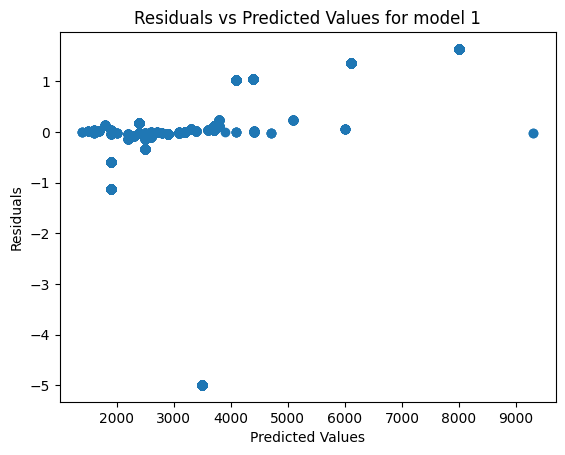

Mean of the residuals for model 1 is: -2.6469928954391153
Correlation between residuals and 0 for model 1: -0.03616614070428413
Correlation between residuals and 1 for model 1: 0.17559849180534756
Correlation between residuals and 2 for model 1: 0.18743259458754377
Autocorrelation for model 1: False
Homoscedasticity for model 1: False
Multicollinearity for model 1: True
Normality for model 1: False
Random effects for group 210x in model 1 follow a normal distribution: False
Random effects for group 311d in model 1 follow a normal distribution: False
Random effects for group 312a in model 1 follow a normal distribution: False
Random effects for group 332a in model 1 follow a normal distribution: False
Random effects for group 341b in model 1 follow a normal distribution: False
Random effects for group 342b in model 1 follow a normal distribution: False
Random effects for group 342f in model 1 follow a normal distribution: False
Random effects for group 342g in model 1 follow a normal di

/tmp/ipykernel_1075602/3841281356.py:46: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11678.
  normality = stats.shapiro(residuals)[1] > 0.05



Results for model 2:



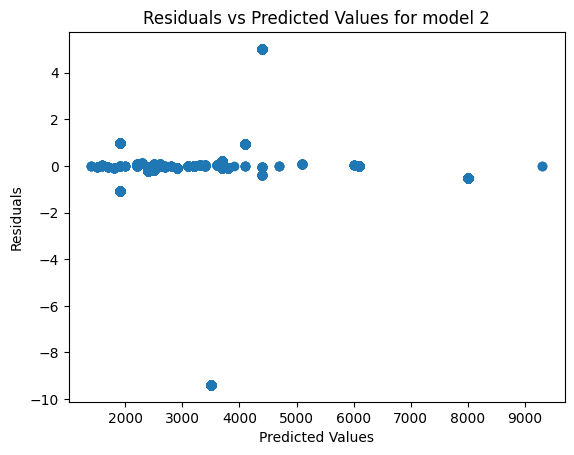

Mean of the residuals for model 2 is: -4.914894672704943
Correlation between residuals and 0 for model 2: 0.051809359046473255
Correlation between residuals and 1 for model 2: 0.10820516141973612
Correlation between residuals and 2 for model 2: 0.29072184270008217
Autocorrelation for model 2: False
Homoscedasticity for model 2: False
Multicollinearity for model 2: True
Normality for model 2: False
Random effects for group 210x in model 2 follow a normal distribution: False
Random effects for group 311d in model 2 follow a normal distribution: False
Random effects for group 312a in model 2 follow a normal distribution: False
Random effects for group 332a in model 2 follow a normal distribution: False
Random effects for group 341b in model 2 follow a normal distribution: False
Random effects for group 342b in model 2 follow a normal distribution: False
Random effects for group 342f in model 2 follow a normal distribution: False
Random effects for group 342g in model 2 follow a normal dis

/tmp/ipykernel_1075602/3841281356.py:46: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11677.
  normality = stats.shapiro(residuals)[1] > 0.05



Results for model 3:



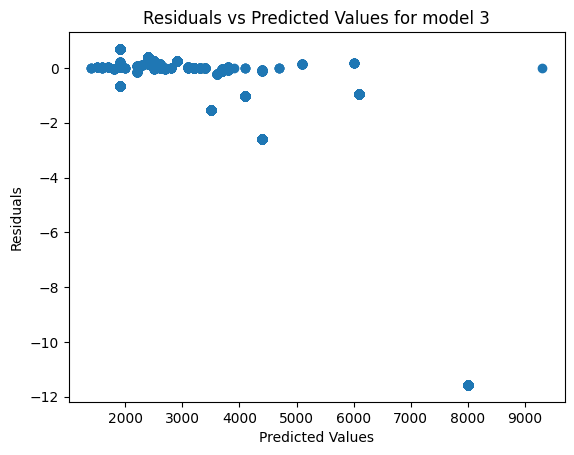

Mean of the residuals for model 3 is: -1.7227344987873403
Correlation between residuals and 0 for model 3: -0.06575805240013056
Correlation between residuals and 1 for model 3: -0.016111298859166727
Correlation between residuals and 2 for model 3: 0.021836944493869522
Autocorrelation for model 3: False
Homoscedasticity for model 3: False
Multicollinearity for model 3: True
Normality for model 3: False
Random effects for group 210x in model 3 follow a normal distribution: False
Random effects for group 311d in model 3 follow a normal distribution: False
Random effects for group 312a in model 3 follow a normal distribution: False
Random effects for group 332a in model 3 follow a normal distribution: False
Random effects for group 341b in model 3 follow a normal distribution: False
Random effects for group 342b in model 3 follow a normal distribution: False
Random effects for group 342f in model 3 follow a normal distribution: False
Random effects for group 342g in model 3 follow a normal

/tmp/ipykernel_1075602/3841281356.py:46: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10958.
  normality = stats.shapiro(residuals)[1] > 0.05



Results for model 4:



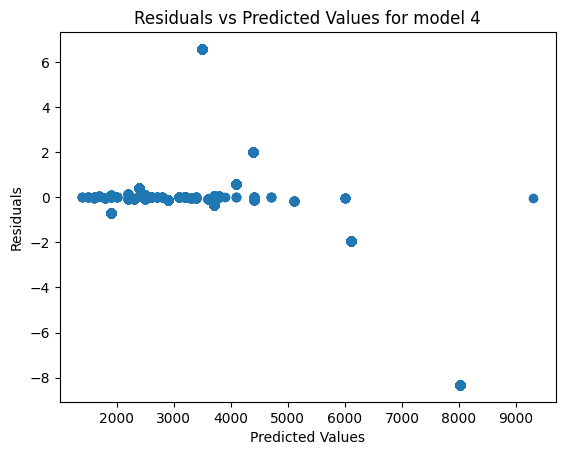

Mean of the residuals for model 4 is: 3.5494149356125084
Correlation between residuals and 0 for model 4: 0.05098287250637008
Correlation between residuals and 1 for model 4: -0.03055983837610056
Correlation between residuals and 2 for model 4: 0.13602847581363664
Autocorrelation for model 4: False
Homoscedasticity for model 4: False
Multicollinearity for model 4: True
Normality for model 4: False
Random effects for group 210x in model 4 follow a normal distribution: False
Random effects for group 311d in model 4 follow a normal distribution: False
Random effects for group 312a in model 4 follow a normal distribution: False
Random effects for group 332a in model 4 follow a normal distribution: False
Random effects for group 341b in model 4 follow a normal distribution: False
Random effects for group 342b in model 4 follow a normal distribution: False
Random effects for group 342f in model 4 follow a normal distribution: False
Random effects for group 342g in model 4 follow a normal dis

/tmp/ipykernel_1075602/3841281356.py:46: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10681.
  normality = stats.shapiro(residuals)[1] > 0.05



Results for model 5:



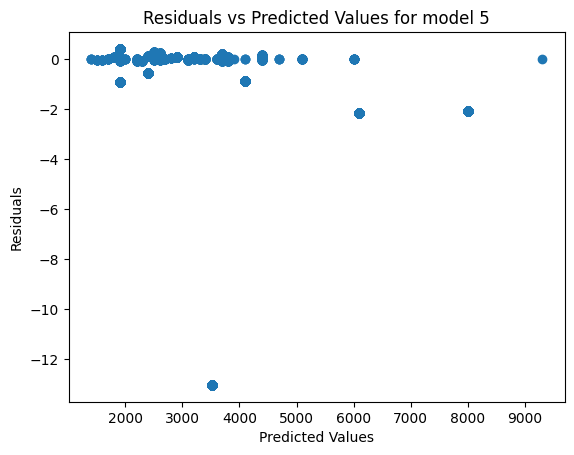

Mean of the residuals for model 5 is: -7.755959838497932
Correlation between residuals and 0 for model 5: -0.10749819872766837
Correlation between residuals and 1 for model 5: 0.05546710009917836
Correlation between residuals and 2 for model 5: -0.15535059336711826
Autocorrelation for model 5: False
Homoscedasticity for model 5: False
Multicollinearity for model 5: True
Normality for model 5: False
Random effects for group 210x in model 5 follow a normal distribution: False
Random effects for group 311d in model 5 follow a normal distribution: False
Random effects for group 312a in model 5 follow a normal distribution: False
Random effects for group 332a in model 5 follow a normal distribution: False
Random effects for group 341b in model 5 follow a normal distribution: False
Random effects for group 342b in model 5 follow a normal distribution: False
Random effects for group 342f in model 5 follow a normal distribution: False
Random effects for group 342g in model 5 follow a normal di

/tmp/ipykernel_1075602/3841281356.py:46: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10621.
  normality = stats.shapiro(residuals)[1] > 0.05



Results for model 6:



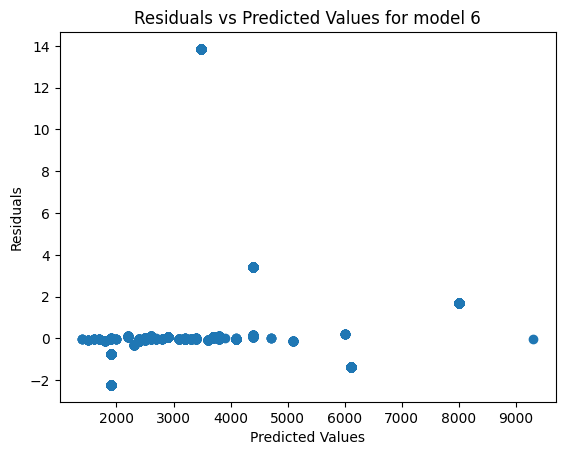

Mean of the residuals for model 6 is: 8.381878246381252
Correlation between residuals and 0 for model 6: 0.1072710411347351
Correlation between residuals and 1 for model 6: -0.06443482992489884
Correlation between residuals and 2 for model 6: 0.141006040492182
Autocorrelation for model 6: False
Homoscedasticity for model 6: False
Multicollinearity for model 6: True
Normality for model 6: False
Random effects for group 210x in model 6 follow a normal distribution: False
Random effects for group 311d in model 6 follow a normal distribution: False
Random effects for group 312a in model 6 follow a normal distribution: False
Random effects for group 332a in model 6 follow a normal distribution: False
Random effects for group 341b in model 6 follow a normal distribution: False
Random effects for group 342b in model 6 follow a normal distribution: False
Random effects for group 342f in model 6 follow a normal distribution: False
Random effects for group 342g in model 6 follow a normal distrib

/tmp/ipykernel_1075602/3841281356.py:46: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10626.
  normality = stats.shapiro(residuals)[1] > 0.05



Results for model 7:



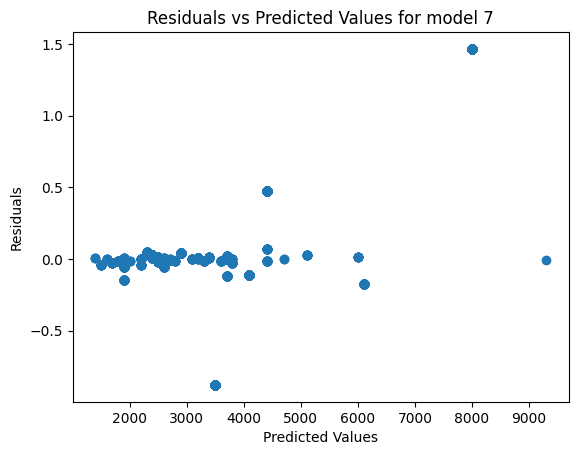

Mean of the residuals for model 7 is: -0.296600123588945
Correlation between residuals and 0 for model 7: 0.0568628256676096
Correlation between residuals and 1 for model 7: 0.002748557828956981
Correlation between residuals and 2 for model 7: -0.07493931552138967
Autocorrelation for model 7: True
Homoscedasticity for model 7: False
Multicollinearity for model 7: True
Normality for model 7: False
Random effects for group 210x in model 7 follow a normal distribution: False
Random effects for group 311d in model 7 follow a normal distribution: False
Random effects for group 312a in model 7 follow a normal distribution: False
Random effects for group 342b in model 7 follow a normal distribution: False
Random effects for group 342f in model 7 follow a normal distribution: False
Random effects for group 342g in model 7 follow a normal distribution: False
Random effects for group 342h in model 7 follow a normal distribution: False
Random effects for group 344a in model 7 follow a normal dist

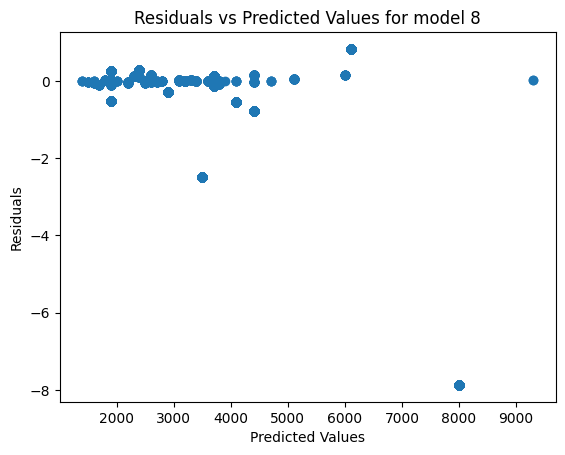

Mean of the residuals for model 8 is: -1.9047414577081943
Correlation between residuals and 0 for model 8: 0.044384997251606745
Correlation between residuals and 1 for model 8: -0.020145559332637876
Correlation between residuals and 2 for model 8: -0.03520529748517989
Autocorrelation for model 8: False
Homoscedasticity for model 8: False
Multicollinearity for model 8: True
Normality for model 8: False
Random effects for group 210x in model 8 follow a normal distribution: False
Random effects for group 311d in model 8 follow a normal distribution: False
Random effects for group 312a in model 8 follow a normal distribution: False
Random effects for group 332a in model 8 follow a normal distribution: False
Random effects for group 341b in model 8 follow a normal distribution: False
Random effects for group 342b in model 8 follow a normal distribution: False
Random effects for group 342f in model 8 follow a normal distribution: False
Random effects for group 342g in model 8 follow a normal

/tmp/ipykernel_1075602/3841281356.py:46: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11524.
  normality = stats.shapiro(residuals)[1] > 0.05



Results for model 9:



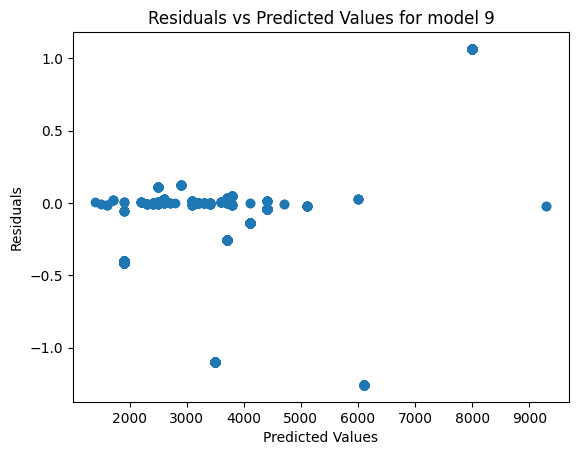

Mean of the residuals for model 9 is: -0.5372196967095192
Correlation between residuals and 0 for model 9: -0.0056140496143384025
Correlation between residuals and 1 for model 9: 0.09216142756321506
Correlation between residuals and 2 for model 9: -0.005831093265904454
Autocorrelation for model 9: False
Homoscedasticity for model 9: False
Multicollinearity for model 9: True
Normality for model 9: False
Random effects for group 210x in model 9 follow a normal distribution: False
Random effects for group 311d in model 9 follow a normal distribution: False
Random effects for group 312a in model 9 follow a normal distribution: False
Random effects for group 341b in model 9 follow a normal distribution: False
Random effects for group 342b in model 9 follow a normal distribution: False
Random effects for group 342f in model 9 follow a normal distribution: False
Random effects for group 342g in model 9 follow a normal distribution: False
Random effects for group 342h in model 9 follow a norma

In [26]:
from statsmodels.regression.mixed_linear_model import MixedLM
from scipy.stats import norm

for i, df in enumerate(dfs):
    # Fit the model
    model = MixedLM.from_formula(f"{outcome} ~ Q('0') + Q('1') + Q('2')", groups=df['PCS_ESE'], data=df)
    results = model.fit()

    print(f"\nResults for model {i+1}:\n")

    # 1. Linearity in the fixed effects: already assumed in the model specification
    #    Linearity in the error term: can be checked by plotting residuals vs predicted values
    predicted_values = results.fittedvalues
    residuals = results.resid
    fig, ax = plt.subplots()
    ax.scatter(predicted_values, residuals)
    ax.set_title(f'Residuals vs Predicted Values for model {i+1}')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    plt.show()

    # 2. The error term's population mean is zero: can be checked by looking at the mean of the residuals
    mean_residuals = residuals.mean()
    print(f"Mean of the residuals for model {i+1} is: {mean_residuals}")

    # 3. No correlations between the independent variables and the error term: can be checked by correlating each predictor with the residuals
    for predictor in predictors:
        print(f"Correlation between residuals and {predictor} for model {i+1}: {df[predictor].corr(residuals)}")

    # 4. Each observation of the error term is independent of others: can be checked using Durbin-Watson test
    autocorrelation = 1.5 < sm.stats.stattools.durbin_watson(residuals) < 2.5
    print(f"Autocorrelation for model {i+1}: {autocorrelation}")

    # 5. The error term's variance is constant: can be checked using Breusch-Pagan test
    _, pval, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals, results.model.exog)
    homoscedasticity = pval > 0.05
    print(f"Homoscedasticity for model {i+1}: {homoscedasticity}")

    # 6. No perfect multicollinearity: can be checked using Variance Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df[predictors].values, j) for j in range(df[predictors].shape[1])]
    multicollinearity = all(vif["VIF Factor"] < 5)
    print(f"Multicollinearity for model {i+1}: {multicollinearity}")

    # 7. The error term adheres to a normal distribution pattern: can be checked using Shapiro-Wilk test
    normality = stats.shapiro(residuals)[1] > 0.05
    print(f"Normality for model {i+1}: {normality}")

    # 8. Random effects are normally distributed: can be checked by comparing the distribution of the random effects to a normal distribution
    random_effects = results.random_effects
    for group, effects in random_effects.items():
        _, pval = stats.kstest(effects, 'norm')
        print(f"Random effects for group {group} in model {i+1} follow a normal distribution: {pval > 0.05}")


Results for model 1:

Number of outliers in model 1: 617


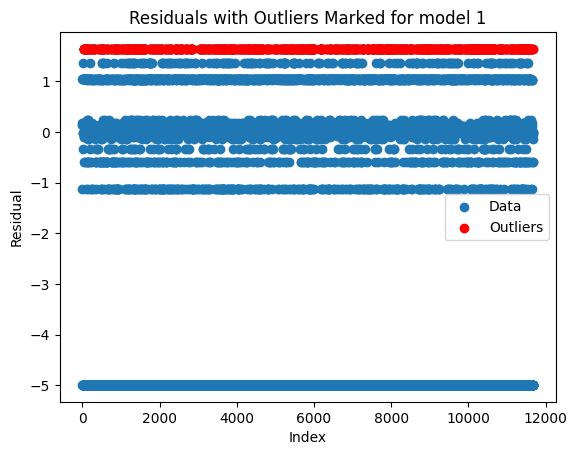


Results for model 2:

Number of outliers in model 2: 981


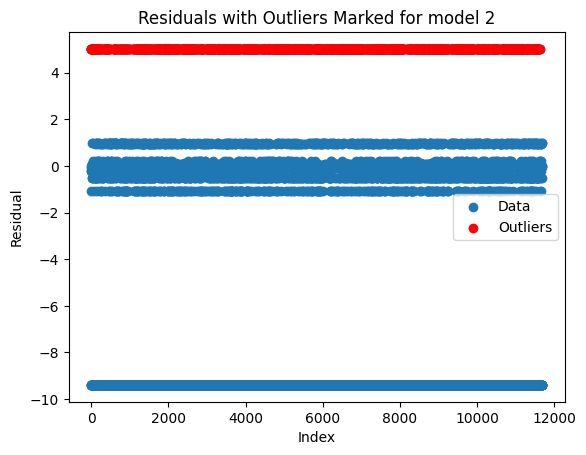


Results for model 3:

Number of outliers in model 3: 564


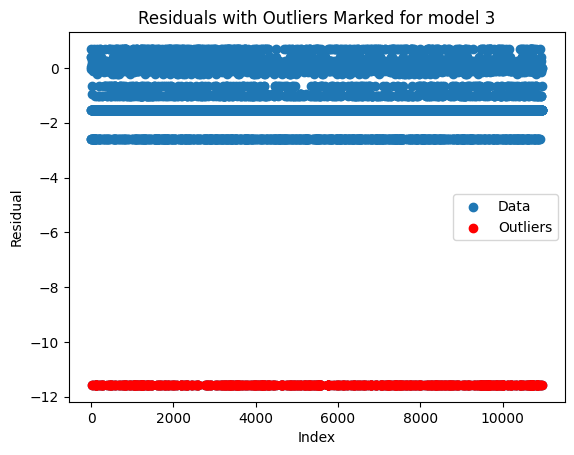


Results for model 4:

Number of outliers in model 4: 547


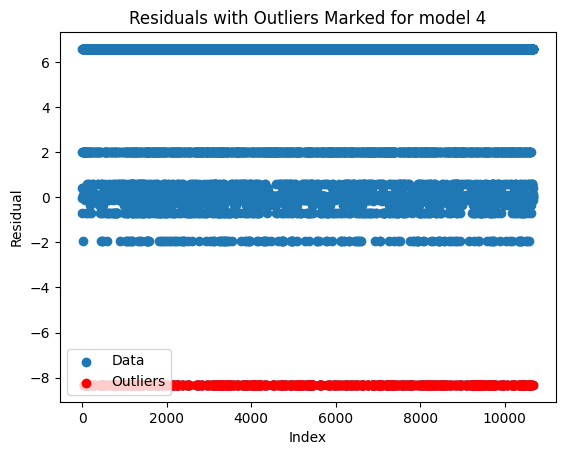


Results for model 5:

Number of outliers in model 5: 0


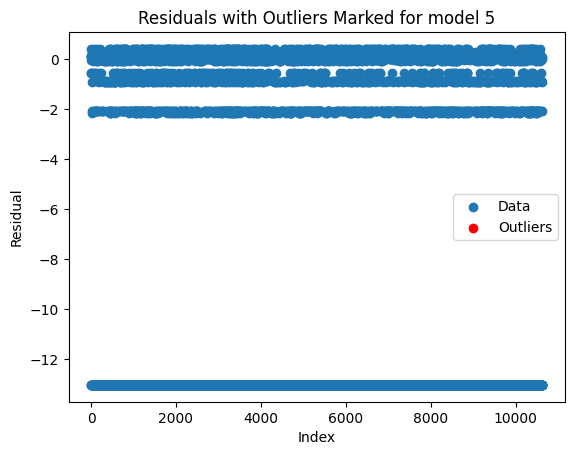


Results for model 6:

Number of outliers in model 6: 279


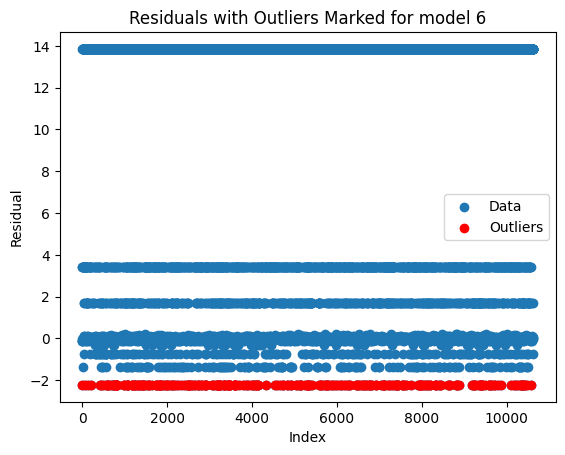


Results for model 7:

Number of outliers in model 7: 148


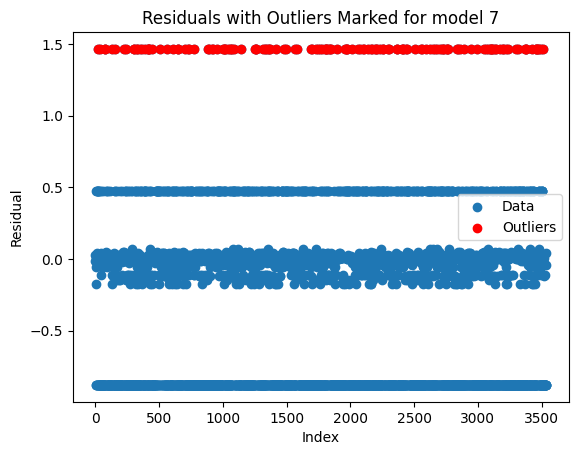


Results for model 8:

Number of outliers in model 8: 796


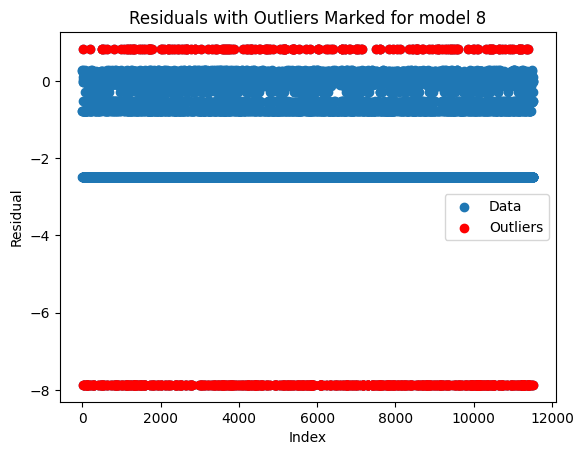


Results for model 9:

Number of outliers in model 9: 302


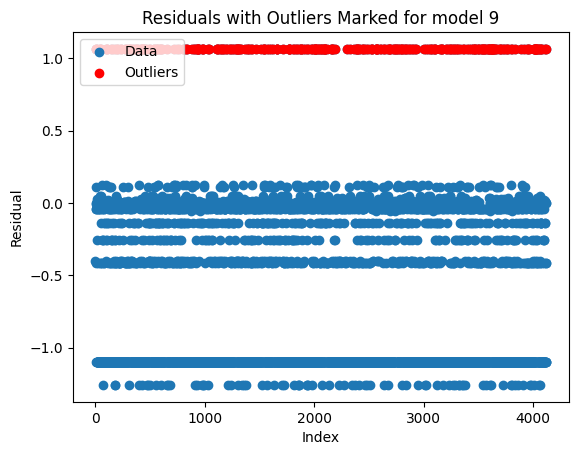

In [33]:
from scipy.stats import zscore

for i, df in enumerate(dfs):
    # Fit the model
    model = MixedLM.from_formula(f"{outcome} ~ Q('0') + Q('1') + Q('2')", groups=df['PCS_ESE'], data=df)
    results = model.fit()

    print(f"\nResults for model {i+1}:\n")

    # Calculate residuals
    residuals = results.resid

    # Calculate z-scores of residuals
    z_scores = zscore(residuals)

    # Identify outliers
    outliers = np.abs(z_scores) > 1.5
    print(f"Number of outliers in model {i+1}: {np.sum(outliers)}")

    # Plot residuals with outliers marked
    fig, ax = plt.subplots()
    ax.scatter(range(len(residuals)), residuals, label='Data')
    ax.scatter(np.where(outliers), residuals[outliers], color='r', label='Outliers')
    ax.set_title(f'Residuals with Outliers Marked for model {i+1}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Residual')
    ax.legend()
    plt.show()


Results for model 1:

Number of outliers in model 1: 1202

Results for model 2:

Number of outliers in model 2: 1246

Results for model 3:

Number of outliers in model 3: 1161

Results for model 4:

Number of outliers in model 4: 1188

Results for model 5:

Number of outliers in model 5: 1194

Results for model 6:

Number of outliers in model 6: 1196

Results for model 7:

Number of outliers in model 7: 316

Results for model 8:

Number of outliers in model 8: 1157

Results for model 9:

Number of outliers in model 9: 420


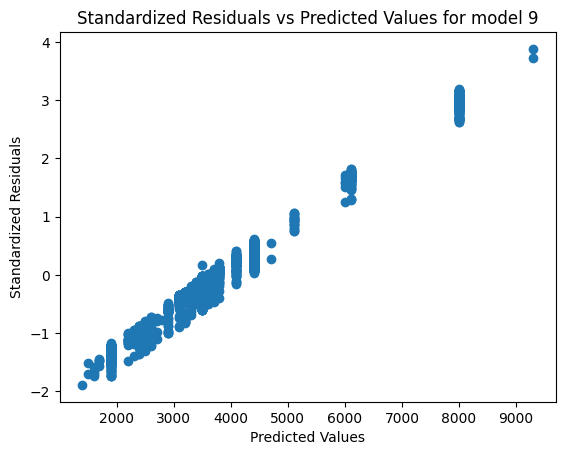

In [47]:
from scipy.stats import zscore
import statsmodels.formula.api as smf

for i, df in enumerate(dfs):
    # Fit the model
    model = smf.ols(f"{outcome} ~ Q('0') + Q('1') + Q('2')", data=df)
    results = model.fit()

    print(f"\nResults for model {i+1}:\n")

    # Calculate residuals
    residuals = results.resid

    # Calculate z-scores of residuals
    z_scores = zscore(residuals)

    # Identify outliers
    outliers = np.abs(z_scores) > 1.5
    print(f"Number of outliers in model {i+1}: {np.sum(outliers)}")

    # Calculate standardized residuals
standardized_residuals = zscore(residuals)

# Plot standardized residuals vs predicted values
fig, ax = plt.subplots()
ax.scatter(predicted_values, standardized_residuals)
ax.set_title(f'Standardized Residuals vs Predicted Values for model {i+1}')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Standardized Residuals')
plt.show()


Results for mixed effects model 1:

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Salaire_moyen_en_EQTP
No. Observations: 56      Method:             REML                 
No. Groups:       56      Scale:              980395.9982          
Min. group size:  1       Log-Likelihood:     -454.8297            
Max. group size:  1       Converged:          Yes                  
Mean group size:  1.0                                              
--------------------------------------------------------------------
              Coef.     Std.Err.    z     P>|z|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept     3289.039   199.041  16.524  0.000   2898.925  3679.153
Q('0')       -1117.355   504.201  -2.216  0.027  -2105.572  -129.139
Q('1')        1518.729   890.290   1.706  0.088   -226.208  3263.665
Q('2')        -133.542   659.259  -0.203  0.839  -1425.665  1158.582
Group Var   980395.

/home/livtollanes/miniconda3/envs/09.2thesis/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


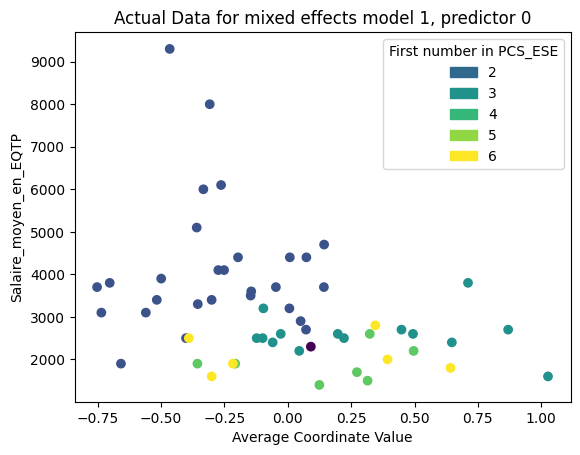

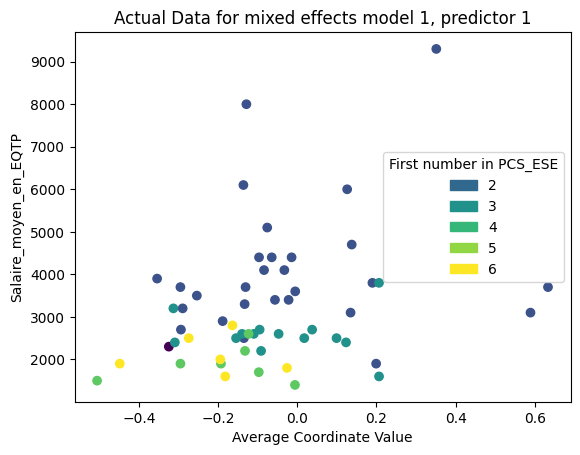

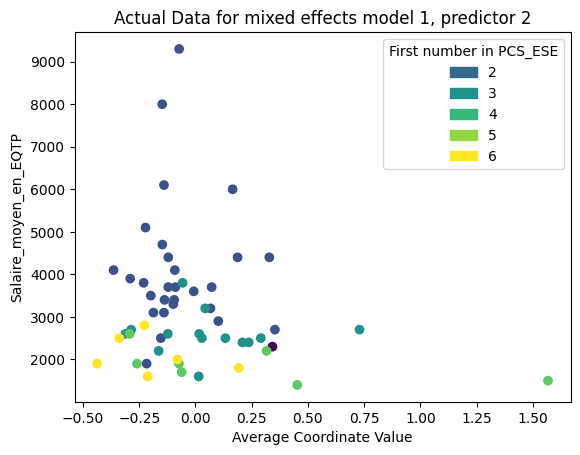


Results for mixed effects model 2:

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Salaire_moyen_en_EQTP
No. Observations: 56      Method:             REML                 
No. Groups:       56      Scale:              968262.0480          
Min. group size:  1       Log-Likelihood:     -454.4569            
Max. group size:  1       Converged:          Yes                  
Mean group size:  1.0                                              
--------------------------------------------------------------------
               Coef.     Std.Err.    z     P>|z|   [0.025    0.975] 
--------------------------------------------------------------------
Intercept      3303.002   183.729  17.978  0.000  2942.900  3663.104
Q('0')         1263.585   398.594   3.170  0.002   482.355  2044.814
Q('1')         1442.932   773.665   1.865  0.062   -73.422  2959.287
Q('2')          422.949   379.765   1.114  0.265  -321.378  1167.276
Group Var    968262

/home/livtollanes/miniconda3/envs/09.2thesis/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


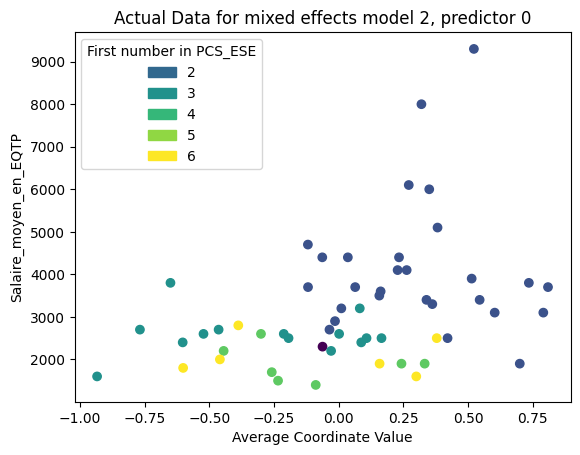

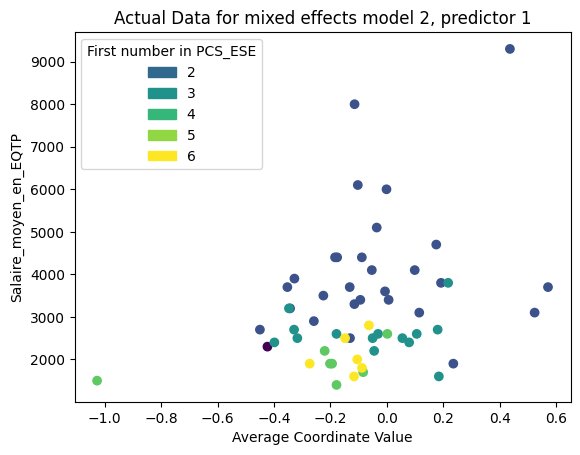

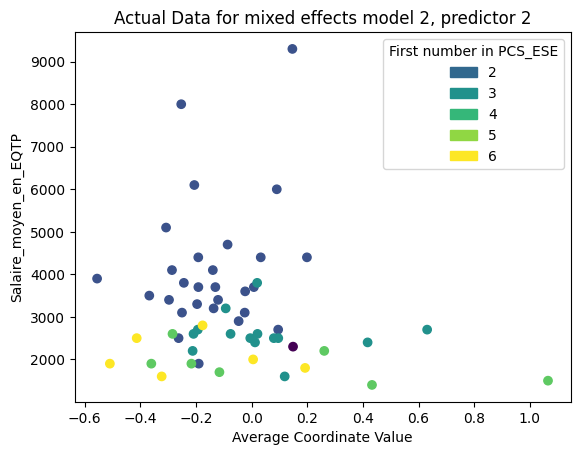


Results for mixed effects model 3:

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Salaire_moyen_en_EQTP
No. Observations: 56      Method:             REML                 
No. Groups:       56      Scale:              834977.6894          
Min. group size:  1       Log-Likelihood:     -449.6415            
Max. group size:  1       Converged:          Yes                  
Mean group size:  1.0                                              
--------------------------------------------------------------------
             Coef.     Std.Err.    z     P>|z|    [0.025     0.975] 
--------------------------------------------------------------------
Intercept    3236.717   210.613  15.368  0.000   2823.923   3649.510
Q('0')       1912.962   549.004   3.484  0.000    836.935   2988.989
Q('1')       2002.668   446.455   4.486  0.000   1127.633   2877.704
Q('2')      -3241.543   917.108  -3.535  0.000  -5039.040  -1444.045
Group Var  834977.6

/home/livtollanes/miniconda3/envs/09.2thesis/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


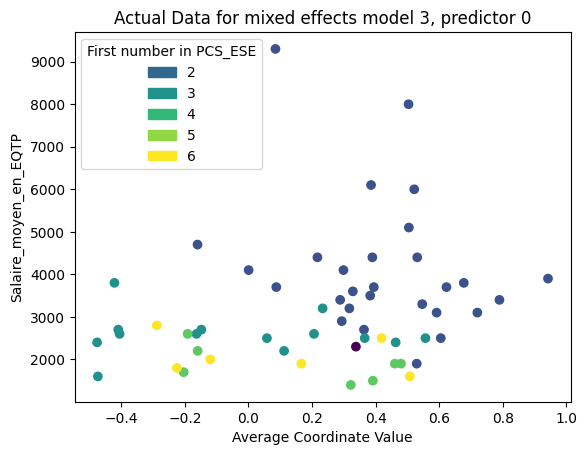

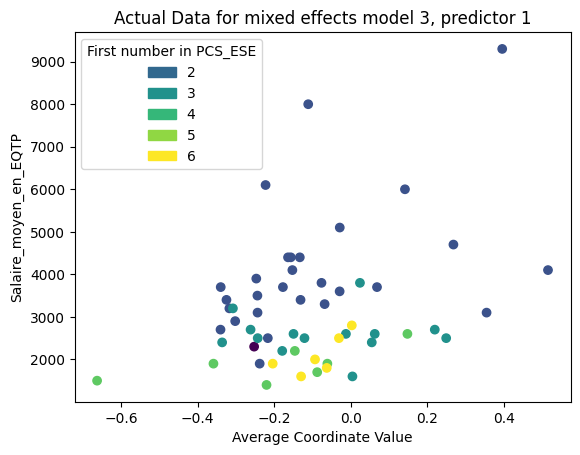

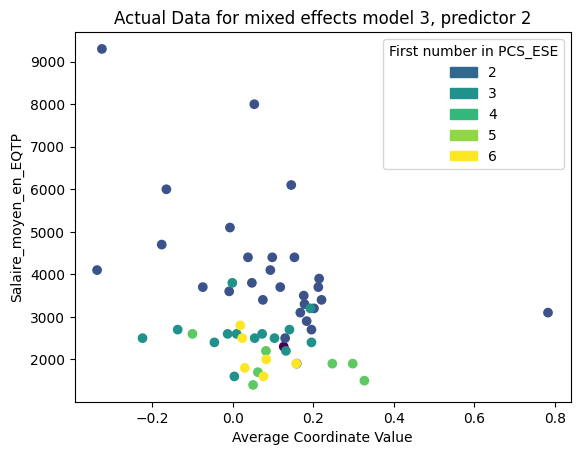


Results for mixed effects model 4:

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Salaire_moyen_en_EQTP
No. Observations: 56      Method:             REML                 
No. Groups:       56      Scale:              963311.5986          
Min. group size:  1       Log-Likelihood:     -453.5442            
Max. group size:  1       Converged:          Yes                  
Mean group size:  1.0                                              
--------------------------------------------------------------------
              Coef.     Std.Err.    z     P>|z|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept     3263.401   152.510  21.398  0.000   2964.487  3562.315
Q('0')        1027.551   367.865   2.793  0.005    306.549  1748.554
Q('1')        -203.308  1518.270  -0.134  0.893  -3179.062  2772.446
Q('2')       -2240.322   733.471  -3.054  0.002  -3677.898  -802.746
Group Var   963311.

/home/livtollanes/miniconda3/envs/09.2thesis/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


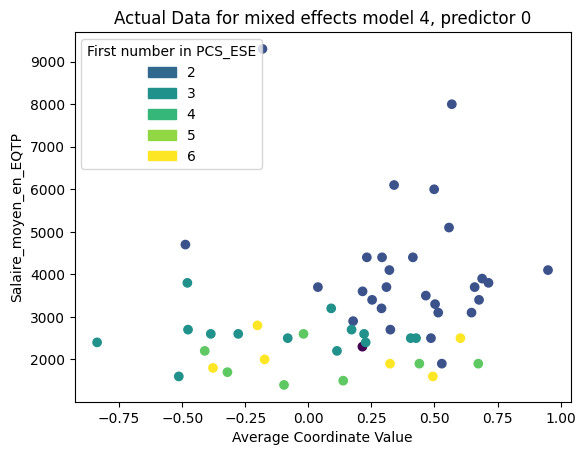

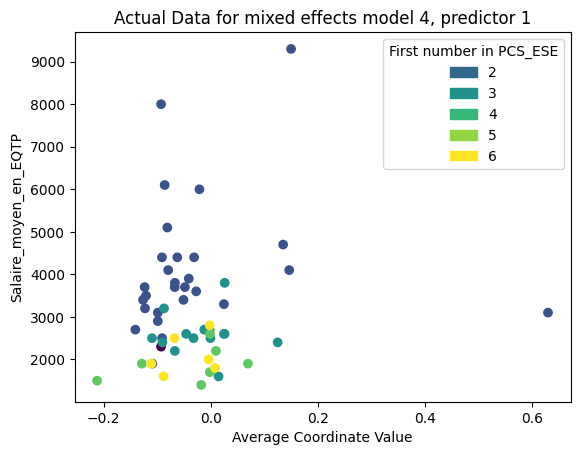

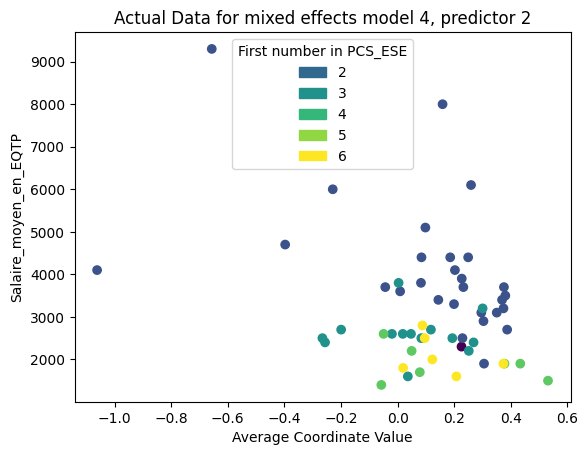


Results for mixed effects model 5:

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Salaire_moyen_en_EQTP
No. Observations: 56      Method:             REML                 
No. Groups:       56      Scale:              977785.3870          
Min. group size:  1       Log-Likelihood:     -453.8593            
Max. group size:  1       Converged:          Yes                  
Mean group size:  1.0                                              
--------------------------------------------------------------------
              Coef.     Std.Err.    z     P>|z|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept     3340.104   151.990  21.976  0.000   3042.210  3637.998
Q('0')         993.682   269.030   3.694  0.000    466.393  1520.972
Q('1')          27.921  1767.666   0.016  0.987  -3436.641  3492.483
Q('2')       -2262.967   821.464  -2.755  0.006  -3873.006  -652.927
Group Var   977785.

/home/livtollanes/miniconda3/envs/09.2thesis/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


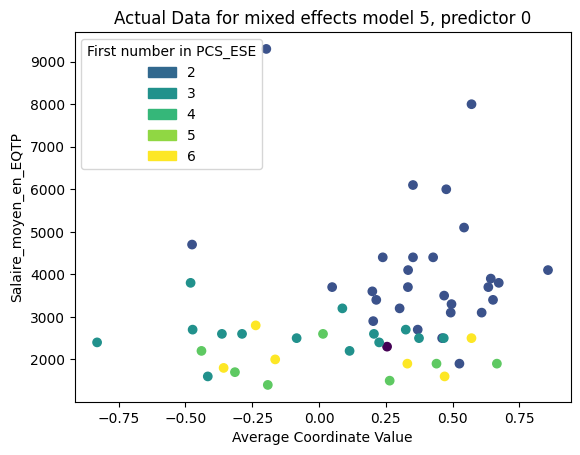

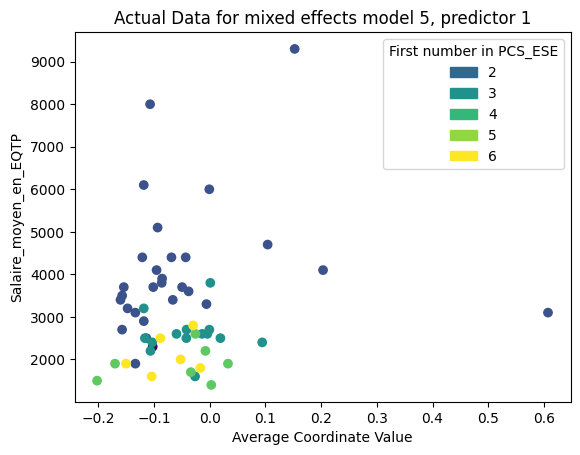

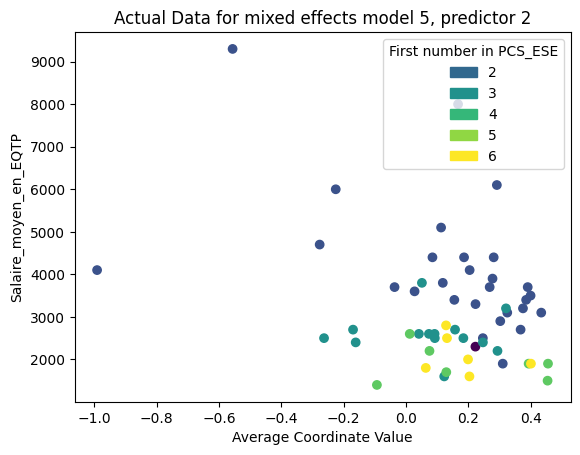


Results for mixed effects model 6:

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Salaire_moyen_en_EQTP
No. Observations: 56      Method:             REML                 
No. Groups:       56      Scale:              974868.4710          
Min. group size:  1       Log-Likelihood:     -453.7555            
Max. group size:  1       Converged:          Yes                  
Mean group size:  1.0                                              
--------------------------------------------------------------------
              Coef.     Std.Err.    z     P>|z|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept     3321.226   190.236  17.458  0.000   2948.371  3694.082
Q('0')        1067.166   464.001   2.300  0.021    157.741  1976.591
Q('1')         116.850  1746.354   0.067  0.947  -3305.941  3539.642
Q('2')       -2243.012   895.181  -2.506  0.012  -3997.534  -488.489
Group Var   974868.

/home/livtollanes/miniconda3/envs/09.2thesis/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


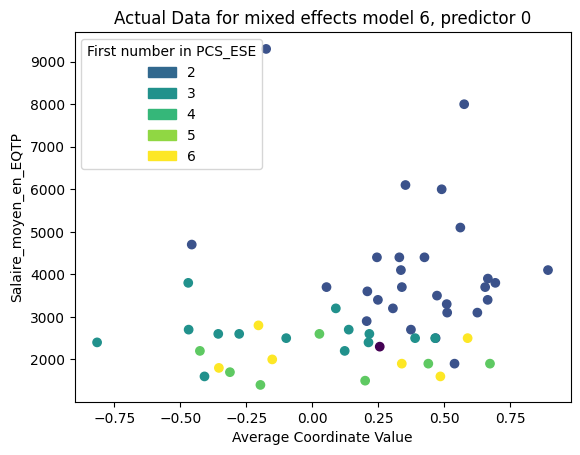

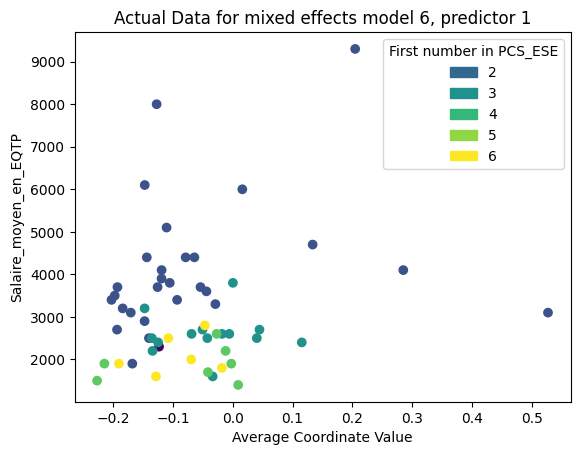

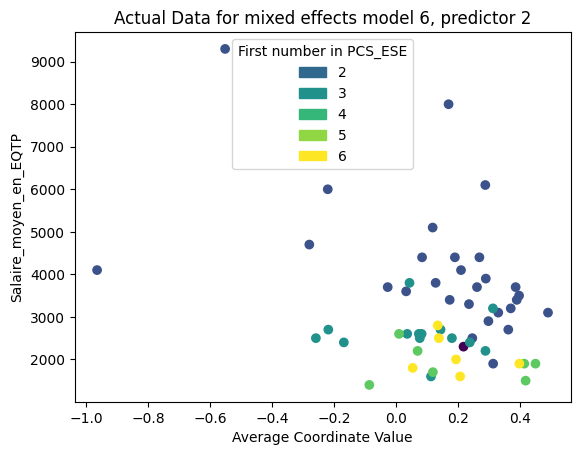


Results for mixed effects model 7:

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Salaire_moyen_en_EQTP
No. Observations: 54      Method:             REML                 
No. Groups:       54      Scale:              1205655.3341         
Min. group size:  1       Log-Likelihood:     -441.9017            
Max. group size:  1       Converged:          Yes                  
Mean group size:  1.0                                              
--------------------------------------------------------------------
              Coef.     Std.Err.    z     P>|z|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept     3196.740   112.569  28.398  0.000   2976.108  3417.371
Q('0')        -267.626   473.895  -0.565  0.572  -1196.443   661.190
Q('1')         844.436  1779.106   0.475  0.635  -2642.548  4331.421
Q('2')         471.326   935.011   0.504  0.614  -1361.261  2303.913
Group Var  1205655.

/home/livtollanes/miniconda3/envs/09.2thesis/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


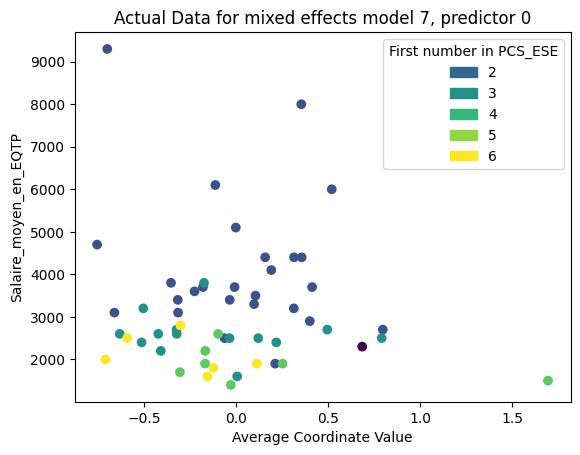

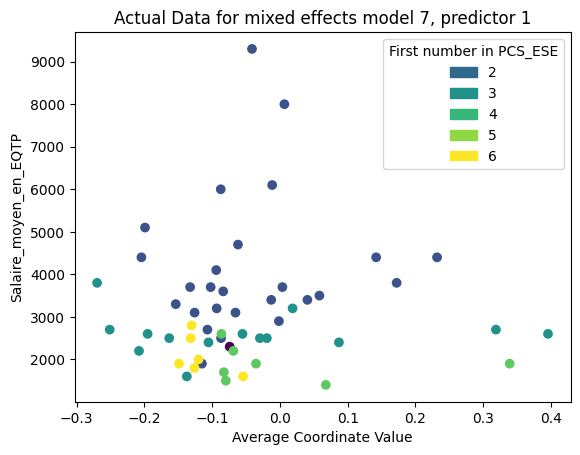

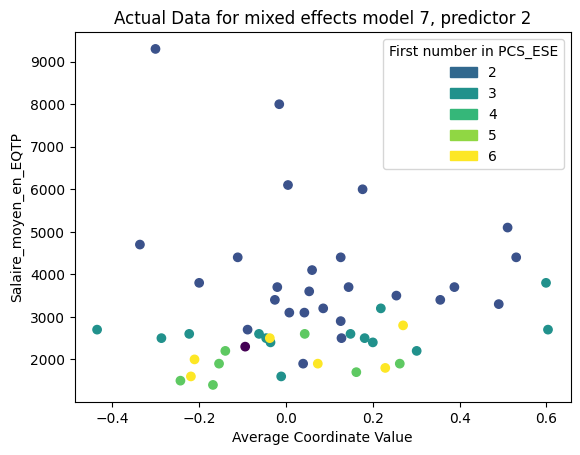


Results for mixed effects model 8:

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Salaire_moyen_en_EQTP
No. Observations: 56      Method:             REML                 
No. Groups:       56      Scale:              1069317.3429         
Min. group size:  1       Log-Likelihood:     -457.1856            
Max. group size:  1       Converged:          Yes                  
Mean group size:  1.0                                              
--------------------------------------------------------------------
              Coef.     Std.Err.    z     P>|z|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept     3215.460   183.713  17.503  0.000   2855.388  3575.531
Q('0')       -1083.620   471.907  -2.296  0.022  -2008.540  -158.699
Q('1')         -68.665   258.430  -0.266  0.790   -575.179   437.849
Q('2')         963.459   693.263   1.390  0.165   -395.311  2322.230
Group Var  1069317.

/home/livtollanes/miniconda3/envs/09.2thesis/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


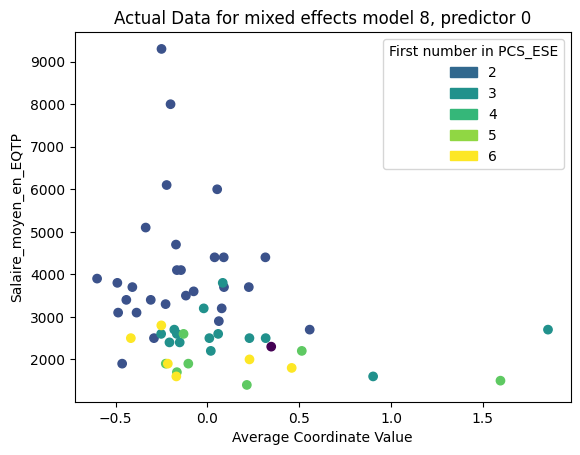

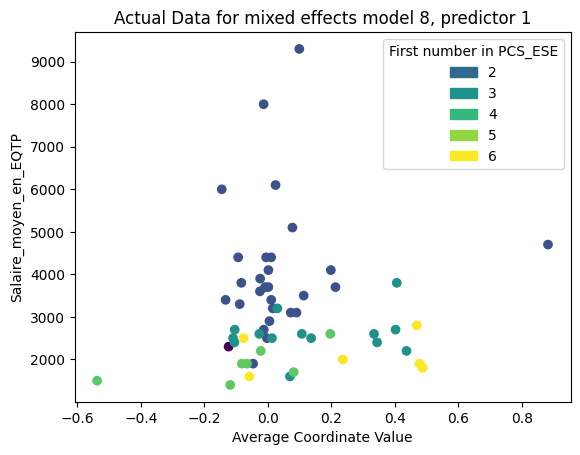

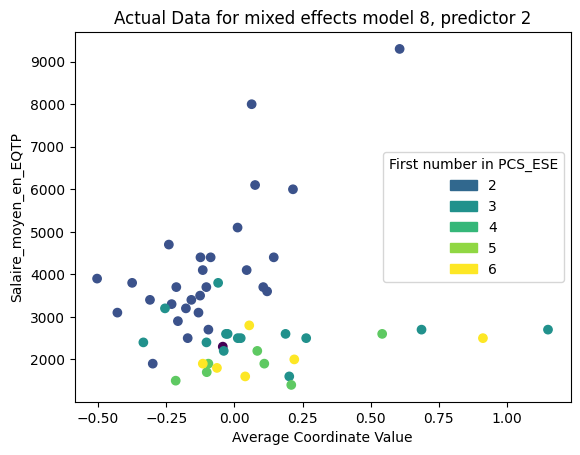


Results for mixed effects model 9:

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Salaire_moyen_en_EQTP
No. Observations: 51      Method:             REML                 
No. Groups:       51      Scale:              1164577.6162         
Min. group size:  1       Log-Likelihood:     -414.9872            
Max. group size:  1       Converged:          Yes                  
Mean group size:  1.0                                              
--------------------------------------------------------------------
              Coef.     Std.Err.    z     P>|z|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept     3481.860   127.304  27.351  0.000   3232.347  3731.372
Q('0')        -172.592  2657.779  -0.065  0.948  -5381.744  5036.559
Q('1')         797.348   401.910   1.984  0.047      9.618  1585.077
Q('2')          52.801   440.177   0.120  0.905   -809.930   915.533
Group Var  1164577.

/home/livtollanes/miniconda3/envs/09.2thesis/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


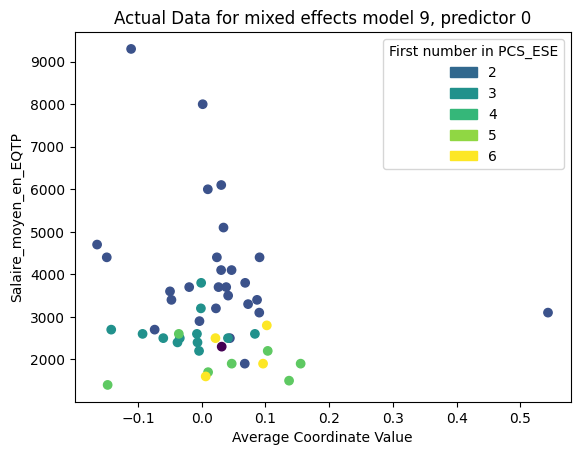

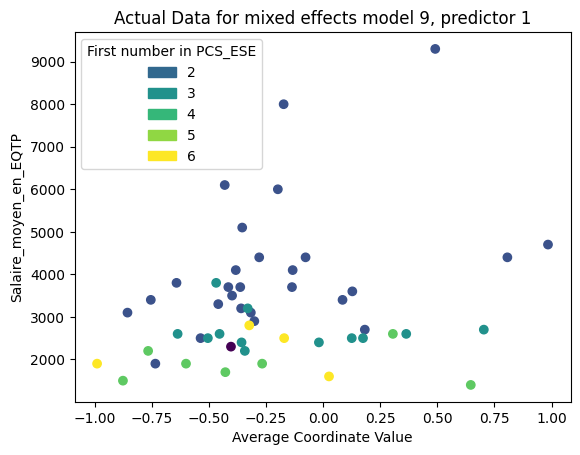

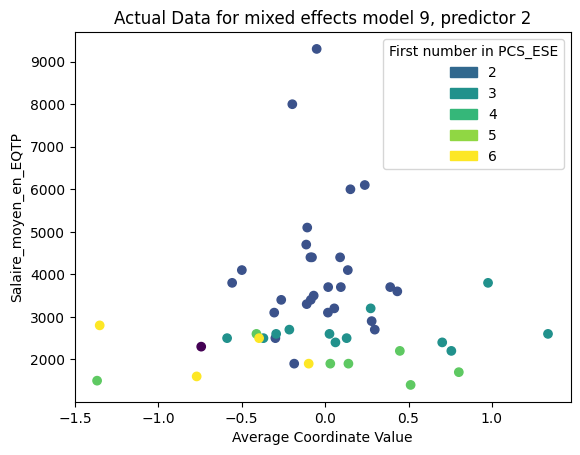

In [45]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib.patches as mpatches

# Define the predictor variables
predictors = ['0', '1', '2']

for i, df in enumerate(dfs):
    # Calculate the average coordinate score in each dimension per 'PCS_ESE' group
    df_grouped = df.groupby('PCS_ESE')[predictors + [outcome]].mean().reset_index()

    # Add a new column for the first number in the 'PCS_ESE' group
    df_grouped['color'] = df_grouped['PCS_ESE'].str[0].astype(int)

    # Fit the model
    model = smf.mixedlm(f"{outcome} ~ Q('0') + Q('1') + Q('2')", data=df_grouped, groups=df_grouped['PCS_ESE'])
    results = model.fit()

    print(f"\nResults for mixed effects model {i+1}:\n")
    print(results.summary())

    # Plot actual data
    for predictor in predictors:
        fig, ax = plt.subplots()
        scatter = ax.scatter(df_grouped[predictor], df_grouped[outcome], c=df_grouped['color'], cmap='viridis')
        ax.set_title(f'Actual Data for mixed effects model {i+1}, predictor {predictor}')
        ax.set_xlabel('Average Coordinate Value')
        ax.set_ylabel(outcome)
        
        # Create a legend for the colors
        color_labels = df_grouped['color'].unique()
        handles = [mpatches.Patch(color=plt.cm.viridis(label / max(color_labels)), label=str(label)) for label in color_labels]
        ax.legend(handles=handles, title='First number in PCS_ESE')

        plt.show()

Here, I am just checking correlations between aggregated coordinate values per job title, and the income. Also checking the correlation between occupational class and income.

#### Cor test


In [88]:
grouped = df1.groupby('PCS_ESE').agg({'0': ['median', 'std'], 'Salaire moyen en EQTP': 'first'}).reset_index() 

In [93]:
from scipy.stats import spearmanr

# Assuming df1 to df9 are your dataframes
dataframes = [df7]

for i, df in enumerate(dataframes, 1):
    grouped = df.groupby('PCS_ESE').agg({'0': ['mean'], 'Salaire moyen en EQTP': 'first'}).reset_index()  
    grouped['class'] = grouped['PCS_ESE'].str[0].astype(int)
    correlation, p_value = spearmanr(grouped[('PCS_ESE')], grouped[('Salaire moyen en EQTP', 'first')])
    if p_value < 0.05:
        print(f"Model m{i}:")
        print(f"Spearman's rank correlation: {correlation}")
        print(f"p-value: {p_value}")
        print("\n")

Model m1:
Spearman's rank correlation: -0.6267390588460803
p-value: 3.978141414513293e-07




Correlations:
- coordinates and salary: not that high overall
    - Dim0: Highest for m1 (-0.31)
    - Dim2: Highest for m2 (-0.38)
- Coordinates and class:  higher than for salaries overall 
    - Dim0: Highest for m2 (-0.383)
- Class and Income: relatively high, but not as high as He&Tsvetkova (-0.7)

In [163]:
for i, df in enumerate(dataframes, 1):
    grouped = df.groupby('title').agg({'0': ['median', 'std'], 'Salaire moyen en EQTP': 'first', 'PCS_ESE': 'first'}).reset_index()
    # Extract the first digit of PCS_ESE as the color
    grouped['class'] = grouped['PCS_ESE', 'first'].str[0].astype(int)
    correlation, p_value = spearmanr(grouped[('class')], grouped[('Salaire moyen en EQTP', 'first')])
    if p_value < 0.05:
        print(f"Model m{i}:")
        print(f"Spearman's rank correlation: {correlation}")
        print(f"p-value: {p_value}")
        print("\n")

Model m1:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m2:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m3:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m4:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m5:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m6:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m7:
Spearman's rank correlation: -0.7049748185751002
p-value: 3.327810703761059e-17


Model m8:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m9:
Spearman's rank correlation: -0.6754583722141156
p-value: 3.2273390712826256e-14




## 3 Model Comparison

Here, I am fitting multidimensional OLS to do model selection. 
The model that gives the best fit will be selected for durther inspection. 

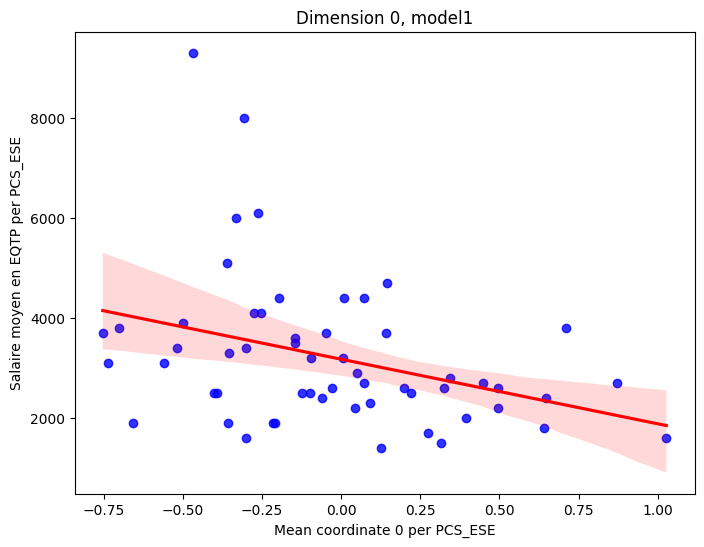

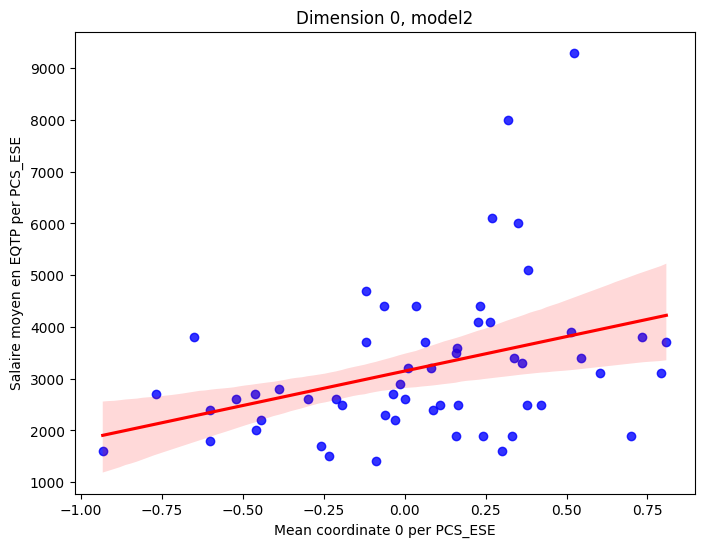

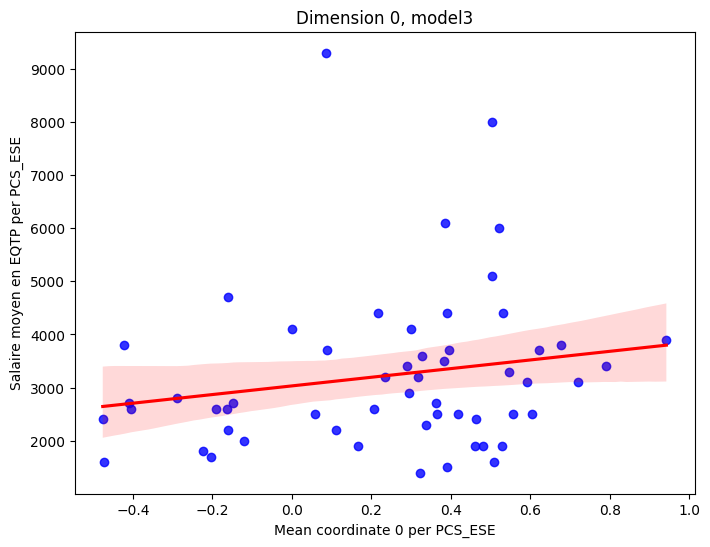

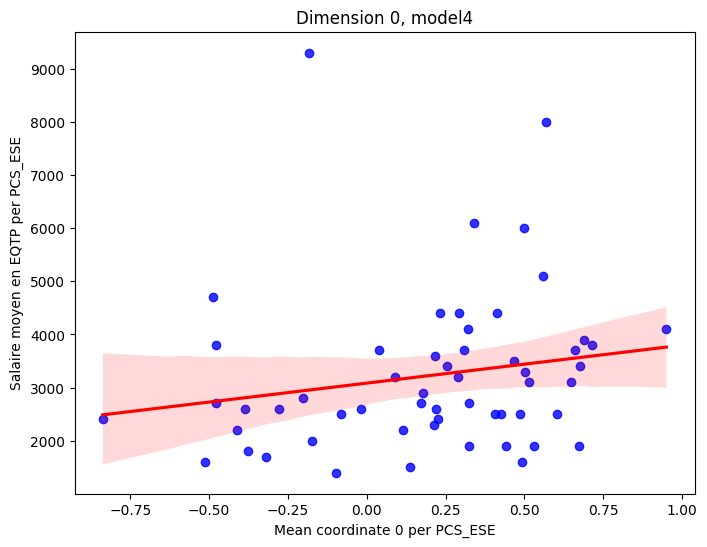

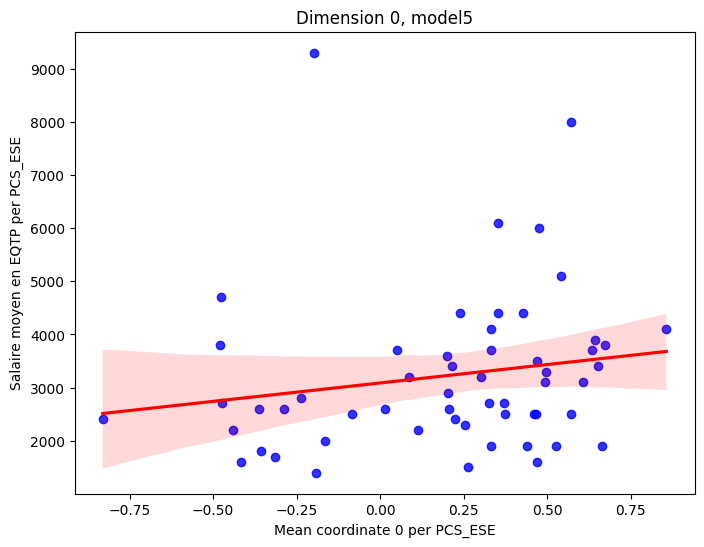

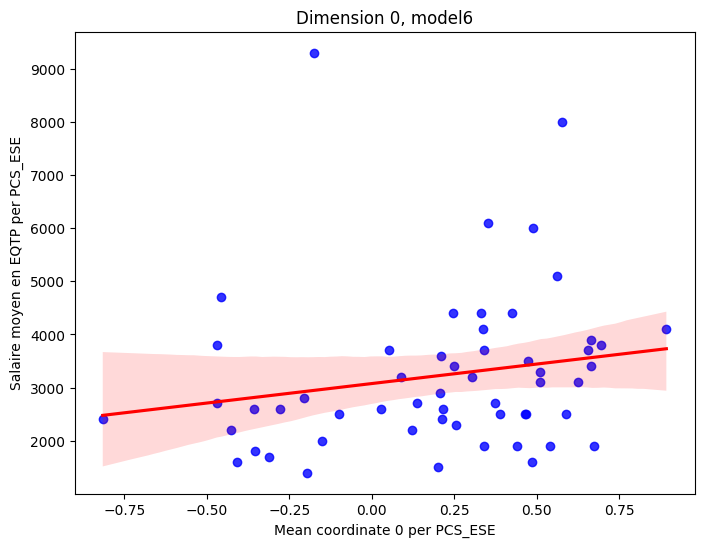

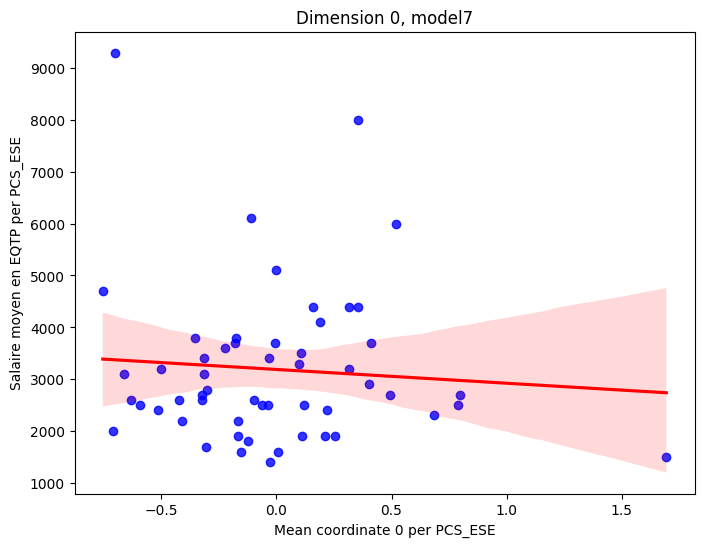

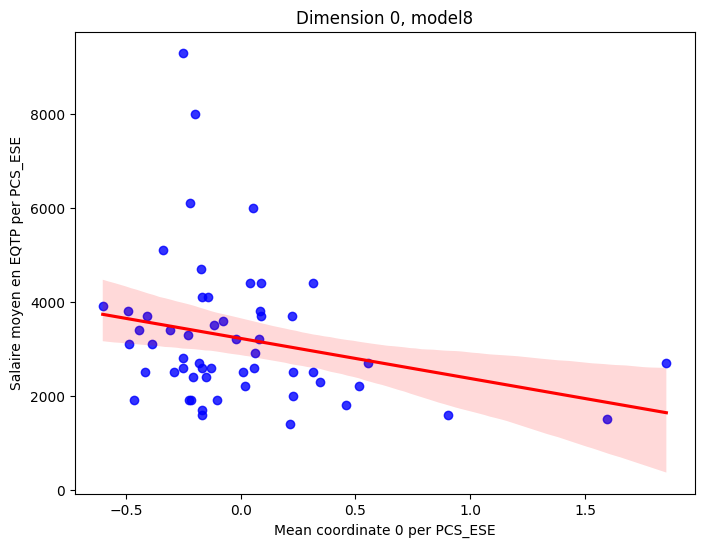

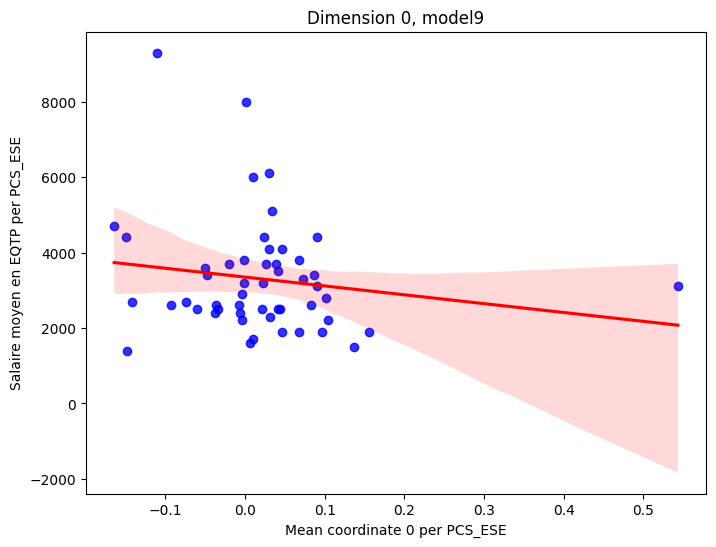

In [80]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

for i, df in enumerate(dataframes, 1):
    X = df[['0']]
    y = df['Salaire moyen en EQTP']


    # Plot relationship between the mean of each independent variable grouped by 'title' and the dependent variable
    for col in X.columns:
        grouped = df.groupby('PCS_ESE')[col].mean()
        income = df.groupby('PCS_ESE')['Salaire moyen en EQTP'].first()
        plt.figure(figsize=(8, 6))
        
        # Use seaborn's regplot function to plot the scatter plot with a regression line and confidence interval
        sns.regplot(x=grouped, y=income, ci=95, color='b', line_kws={'color':'red'})
        
        plt.xlabel(f'Mean coordinate {col} per PCS_ESE')
        plt.ylabel('Salaire moyen en EQTP per PCS_ESE')
        plt.title(f'Dimension {col}, model{i}')
        plt.show()


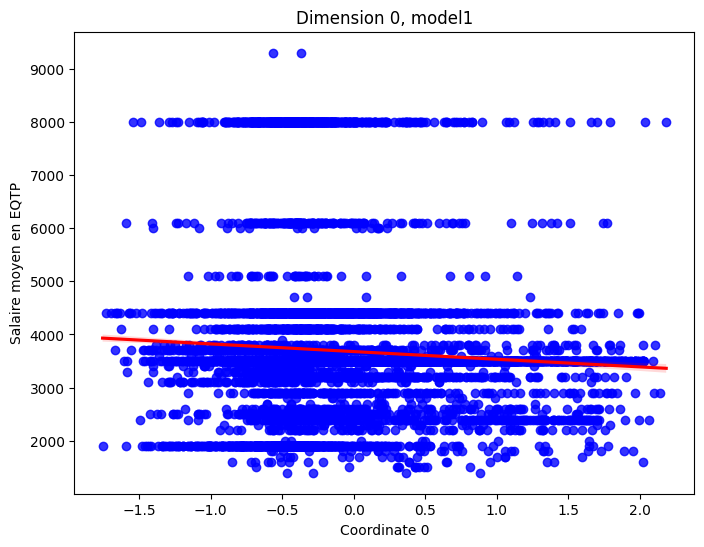

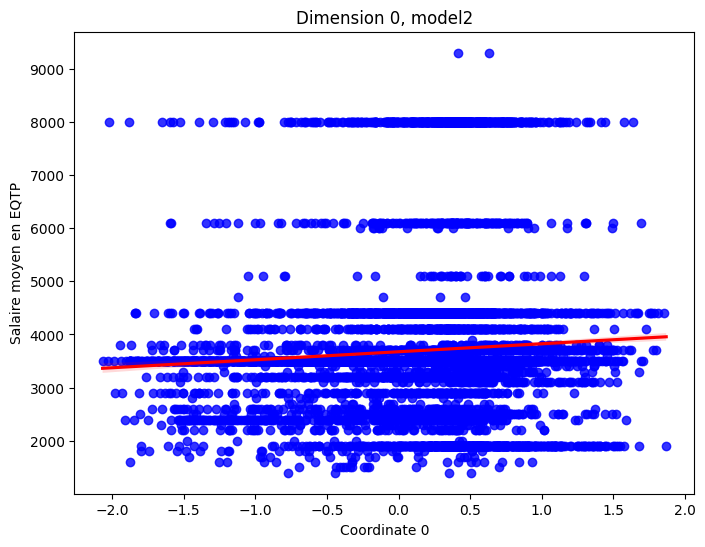

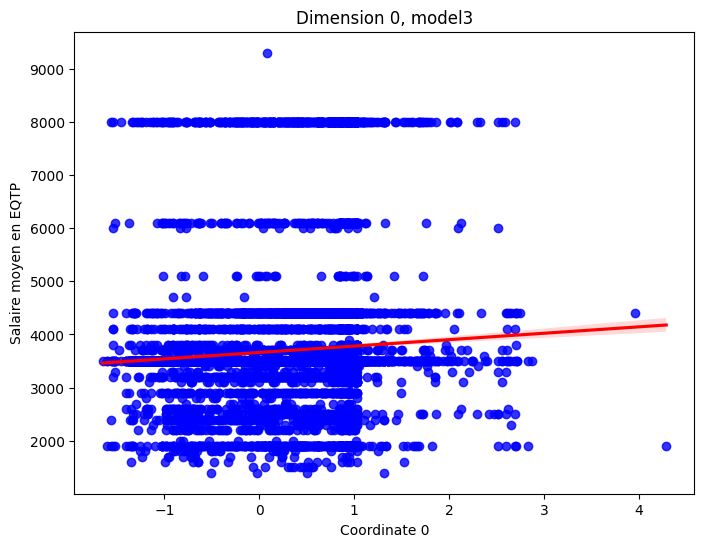

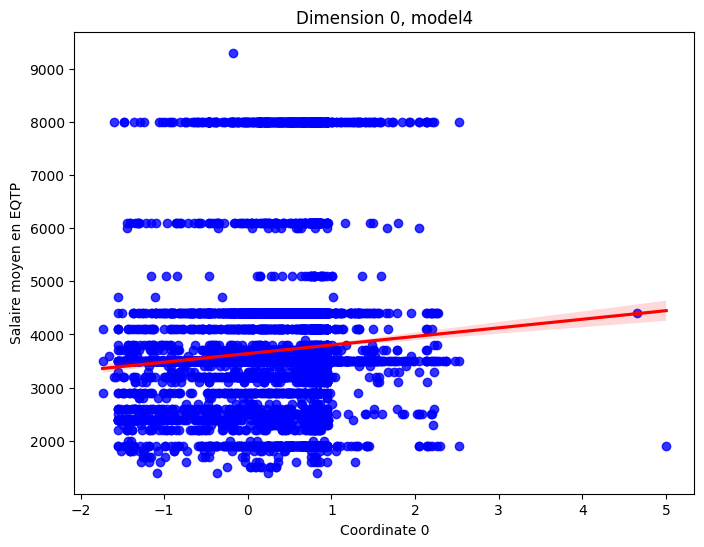

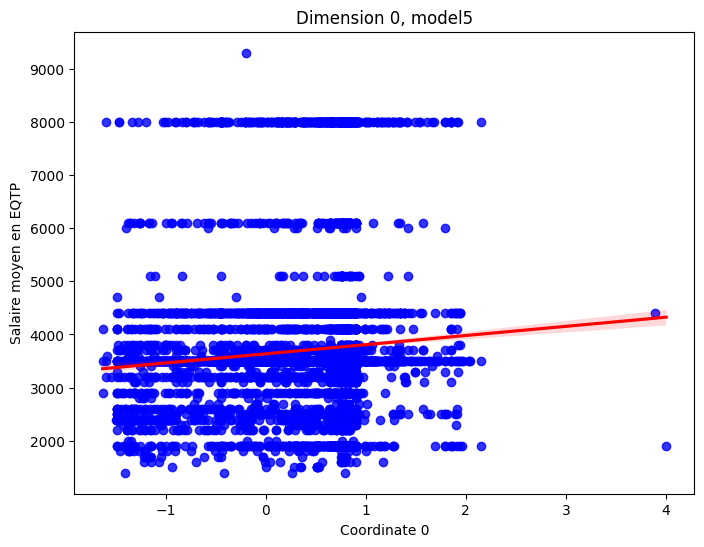

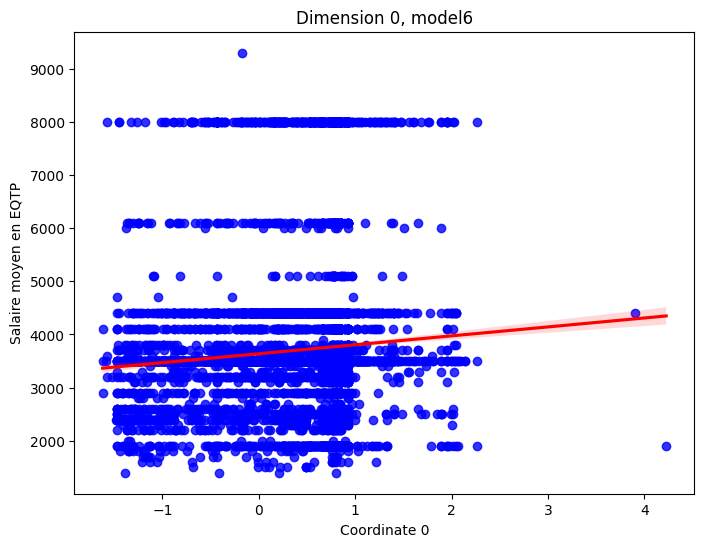

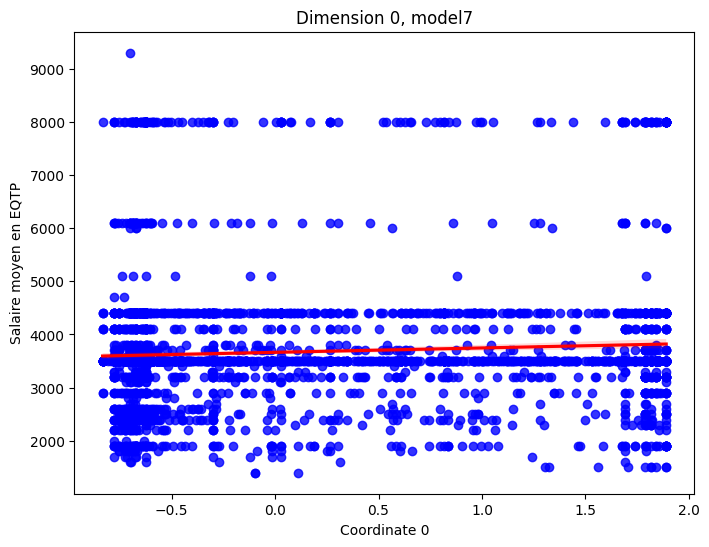

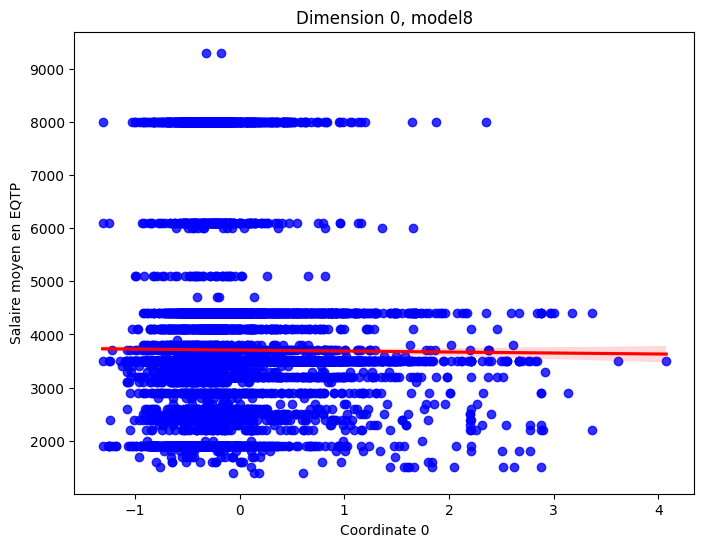

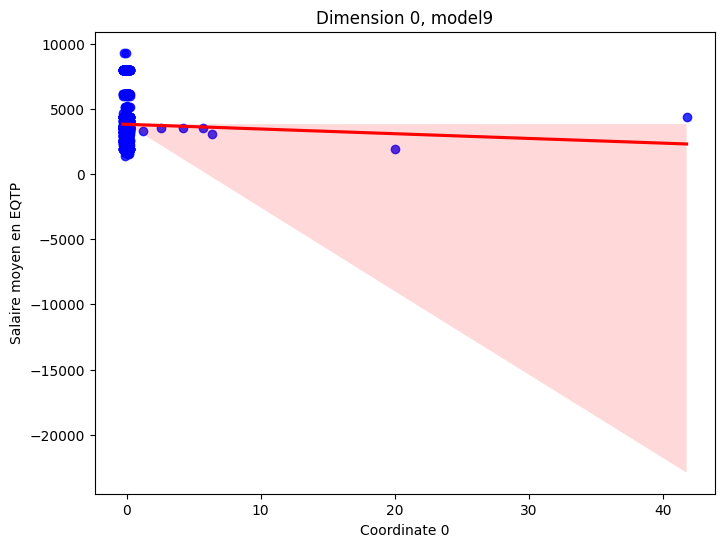

In [81]:
for i, df in enumerate(dataframes, 1):
    X = df[['0']]
    y = df['Salaire moyen en EQTP']

    # Plot relationship between each independent variable and the dependent variable
    for col in X.columns:
        plt.figure(figsize=(8, 6))
        
        # Use seaborn's regplot function to plot the scatter plot with a regression line and confidence interval
        sns.regplot(x=df[col], y=y, ci=95, color='b', line_kws={'color':'red'})
        
        plt.xlabel(f'Coordinate {col}')
        plt.ylabel('Salaire moyen en EQTP')
        plt.title(f'Dimension {col}, model{i}')
        plt.show()

In [84]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize a dictionary to store RMSE values and fitted models for each model
rmse_values = {}
fitted_models = {}

for i, df in enumerate(dataframes, 1):
    # Assume that '0', '1', and '2' are the names of your dimensions
    X = df[['0', '1', '2']]
    y = df['Salaire moyen en EQTP']

    # Add a constant to the independent variables matrix
    X = sm.add_constant(X)

    # Perform multiple linear regression
    model = sm.OLS(y, X)
    results = model.fit()

    # Calculate the RMSE and store it
    y_pred = results.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values[f'model{i}'] = rmse

    # Store the fitted model
    fitted_models[f'model{i}'] = results

    print(f"RMSE for model{i}: {rmse}")

# Print the model with the lowest RMSE
best_model = min(rmse_values, key=rmse_values.get)
print(f"The best model is {best_model} with an RMSE of {rmse_values[best_model]}")

# Print the coefficients of the best model
print(f"Coefficients of the best model: {fitted_models[best_model].params}")

RMSE for model1: 1219.8580710715348
RMSE for model2: 1220.2615565678038
RMSE for model3: 1193.7602963940647
RMSE for model4: 1188.3892011275436
RMSE for model5: 1187.0013680094878
RMSE for model6: 1187.7606180458972
RMSE for model7: 1160.4723422724585
RMSE for model8: 1219.785833154596
RMSE for model9: 1390.7129604749882
The best model is model7 with an RMSE of 1160.4723422724585
Coefficients of the best model: const    3666.368838
0          80.241788
1          15.258734
2         -13.800640
dtype: float64
